# Lead Conversion Score Prediction using Python

A well qualified lead is gold for any business. Sales and marketing teams spend a lot their time and effort to validate the quality of lead. A 1% increase in conversion rate for leads could save thousands/millions of dollars for any organisation. It is not only about spending effort on leads that could convert but also saving effort on leads with low probability.
The overall goal of this project is to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance


### Problem Statement

Credit Card Lead Prediction
Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.
The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 
In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

___Predict the customers that could show higher intent towards a recommended credit card___

- expected inputs to the model
 1. Customer details (gender, age, region etc.)
 2. Details of his/her relationship with the bank (Channel_Code,Vintage, Avg_Asset_Value etc.)
 
- Target variable is,  Is_Lead (Lead_Prediction)


- evaluation protocol
 -The evaluation metric for this Problem is __roc_auc_score__
 
 Its a Supervised - classification problem

## Hypothesis Generation

* Male Gender are more interested for the Credit Card
* Urban Regions are more interested for the Credit Card
* Salaried Occupation  are more interested for the Credit Card
* Credit_Product =1 are more interested for the Credit Card
* Is_Active = 1 are more interested for the Credit Card

* Young Age- Category  are more interested for the Credit Card 
* High Vinatage  are more interested for the Credit Card
* High Avg- Balance  are more interested for the Credit Card



## Step 1: Load essential Python Libraries

In [1]:
# Set Location path :

import os
os.chdir(r"D:\Datascience\Analytics vidya\LabAV\ML hackathon2 Lead Prediction")

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # Plotting charts
%matplotlib inline
import seaborn as sns # Plotting charts
sns.set_style('white')


from math import sqrt
from statistics import mean 

from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer




# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

## Step 2: Load Training/Test datasets in Python environment

In [2]:
train = pd.read_csv('train_s3TEQDk_IyaGz9Y_nvfXhoC.csv') # Load training dataset
test = pd.read_csv('test_mSzZ8RL_DKa2Eez_7CURkcw.csv') # Load test dataset
sample = pd.read_csv('sample_submission_eyYijxG_UYrG05O_ZFkUkEW.csv') # Load final submission dataset

print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train.shape, test.shape))


Train dataset shape: (245725, 11), 
Test dataset shape: (105312, 10)


In [4]:
trainorg = train.copy()
testorg = test.copy()


# Initial feel about the data

train.head(10)

ID  Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  NNVBBKZB  Female   73       RG268          Other           X3       43   
1  IDD62UNG  Female   30       RG277       Salaried           X1       32   
2  HD3DSEMC  Female   56       RG268  Self_Employed           X3       26   
3  BF3NC7KV    Male   34       RG270       Salaried           X1       19   
4  TEASRWXV  Female   30       RG282       Salaried           X1       33   
5  ACUTYTWS    Male   56       RG261  Self_Employed           X1       32   
6  ETQCZFEJ    Male   62       RG282          Other           X3       20   
7  JJNJUQMQ  Female   48       RG265  Self_Employed           X3       13   
8  ZMQFYKCB  Female   40       RG283  Self_Employed           X2       38   
9  NVKTFBA2  Female   55       RG268  Self_Employed           X2       49   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0             No              1045696        No        0  
1             No               581988        No        0  
2             No              1484315       Yes        0  
3             No               470454        No        0  
4             No               886787        No        0  
5             No               544163       Yes        0  
6            NaN              1056750       Yes        1  
7             No               444724       Yes        0  
8             No              1274284        No        0  
9            Yes              2014239        No        0

In [4]:
train.shape

(245725, 11)

In [5]:
test.shape

(105312, 10)

In [6]:
train.dtypes # Data Variable identification, typecasting

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [7]:
train.describe()

Age        Vintage  Avg_Account_Balance        Is_Lead
count  245725.000000  245725.000000         2.457250e+05  245725.000000
mean       43.856307      46.959141         1.128403e+06       0.237208
std        14.828672      32.353136         8.529364e+05       0.425372
min        23.000000       7.000000         2.079000e+04       0.000000
25%        30.000000      20.000000         6.043100e+05       0.000000
50%        43.000000      32.000000         8.946010e+05       0.000000
75%        54.000000      73.000000         1.366666e+06       0.000000
max        85.000000     135.000000         1.035201e+07       1.000000

In [8]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [9]:
#number of missing values
train.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [10]:
### Seperating categorical and numerical features

num_feat = [ 'Age',  'Vintage', 'Avg_Account_Balance']
ohe_feat = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code','Credit_Product', 'Is_Active']

# step 3. EDA (Exploratory Data Analysis)

### Target variable exploration  --->  ___Is_Lead___

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

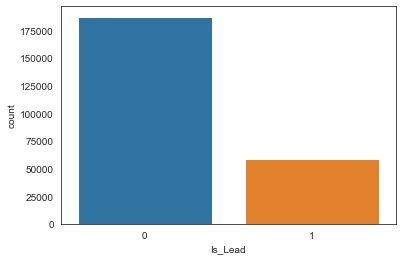

In [11]:
sns.countplot(x='Is_Lead',data=train)

In [12]:
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [13]:
train['Is_Lead'].value_counts(normalize=True)

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

The Train dataset is an imbalanced dataset where above 75% are Zero value

## Univariate Analysis - Numerical variables

In [14]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True, color="green")
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

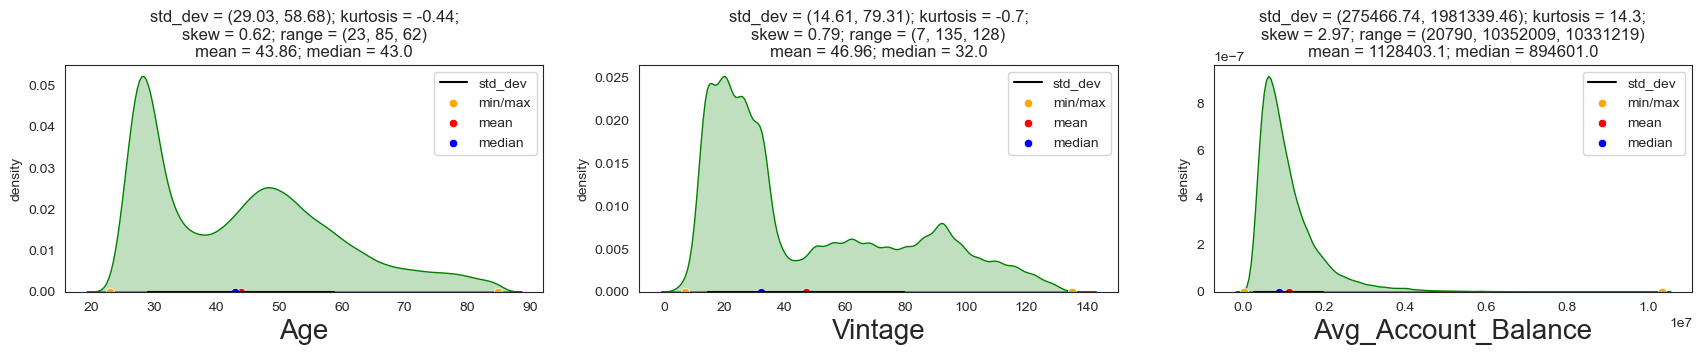

In [15]:
UVA_numeric(train, num_feat) # Numeric variables

### 1. Age of Customers

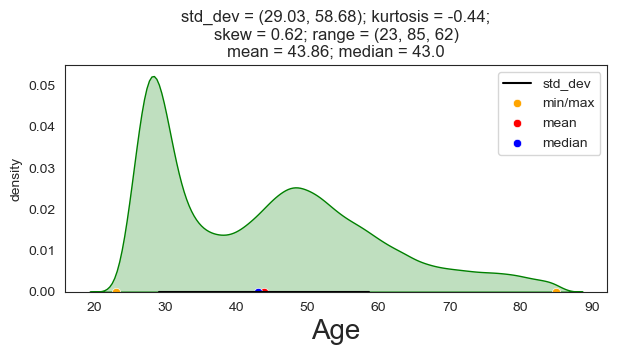

In [16]:
UVA_numeric(train,["Age"]) # Detailed exploration - Age

In [17]:
train["Age"].describe()

count    245725.000000
mean         43.856307
std          14.828672
min          23.000000
25%          30.000000
50%          43.000000
75%          54.000000
max          85.000000
Name: Age, dtype: float64

## Summary of Age
* Mean age = 43.85
* Median age = 43

* most customers are in between 23 and 85
* skewness = +0.62 positively skewed
* Kurtosis =-0.44, less exreme value presence

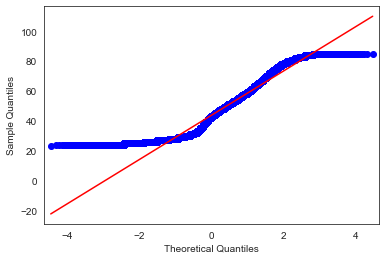

In [18]:
import statsmodels.api as sm
sm.qqplot(train['Age'], line ="s")
plt.show()

### 2. Vintage of Customers

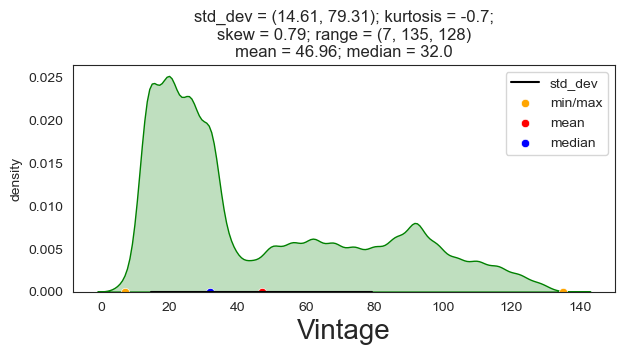

In [19]:
UVA_numeric(train,["Vintage"]) # Detailed exploration - Vintage

In [20]:
train["Vintage"].describe() 

count    245725.000000
mean         46.959141
std          32.353136
min           7.000000
25%          20.000000
50%          32.000000
75%          73.000000
max         135.000000
Name: Vintage, dtype: float64

## Summary of Vintage
* Mean Vintage = 46.95 months
* Median Vintage = 32 months

* most customers are in between 7 and 135 months
* skewness = +0.79 positively skewed
* Kurtosis =-0.7, less exreme value presence

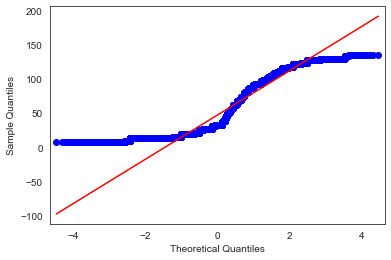

In [21]:
import statsmodels.api as sm
sm.qqplot(train['Vintage'], line ="s")
plt.show()

### 3.Avg_Account_Balance

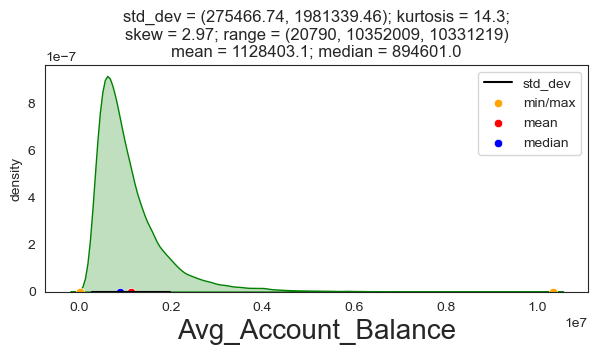

In [22]:
UVA_numeric(train,["Avg_Account_Balance"]) # Detailed exploration - Avg_Account_Balance

In [23]:
train["Avg_Account_Balance"].describe()

count    2.457250e+05
mean     1.128403e+06
std      8.529364e+05
min      2.079000e+04
25%      6.043100e+05
50%      8.946010e+05
75%      1.366666e+06
max      1.035201e+07
Name: Avg_Account_Balance, dtype: float64

## Summary of Avg_Account_Balance
* Mean Avg_Account_Balance = 11.28 lakhs
* Median Avg_Account_Balance = 8.94 lakhs

* most customers are in between 20k and 10 Million
* skewness = +0.2.97 very positively skewed
* Kurtosis = +14.3, **exreme outlier value presence**

<AxesSubplot:xlabel='Avg_Account_Balance'>

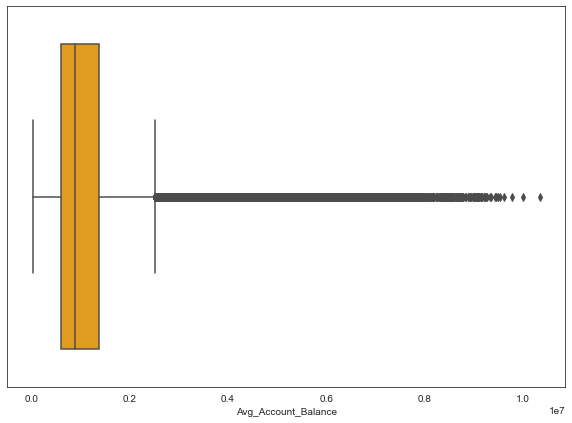

In [24]:
# Avg_Account_Balance Boxplot

plt.figure(figsize=(10,7))
sns.boxplot(data=train ,x=train["Avg_Account_Balance"],color='Orange')

In [25]:
Q1=train['Avg_Account_Balance'].quantile(0.25)
Q3=train['Avg_Account_Balance'].quantile(0.75)

print(Q1)
print(Q3)
IQR= Q3-Q1
print(IQR)
Lower_Whisker = Q1 -(1.5*IQR)
Upper_Whisker = Q3 +(1.5*IQR)
print(Lower_Whisker, Upper_Whisker)

604310.0
1366666.0
762356.0
-539224.0 2510200.0


In [26]:
# Detailed study
AccBaloutlier= train[(train['Is_Lead'] ==1) & (train['Avg_Account_Balance'] >2510200) ]
AccBaloutlier

ID  Gender  Age Region_Code     Occupation Channel_Code  \
262     HJFEIUAE  Female   62       RG254          Other           X2   
265     SD5KZ8PG  Female   53       RG283  Self_Employed           X3   
277     YEJ3FOPT    Male   42       RG268       Salaried           X3   
386     H68HREE6  Female   49       RG284  Self_Employed           X2   
454     8CU34OKF    Male   63       RG268       Salaried           X3   
...          ...     ...  ...         ...            ...          ...   
245544  NGXDTS2H    Male   26       RG268       Salaried           X1   
245560  4YN3ALQG    Male   49       RG254   Entrepreneur           X3   
245601  LPAPKCDW  Female   48       RG254  Self_Employed           X3   
245629  H7YEAN36    Male   49       RG254  Self_Employed           X2   
245653  UKT5GX45    Male   46       RG257  Self_Employed           X1   

        Vintage Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
262          69            Yes              2729727       Yes        1  
265         116            Yes              2555270       Yes        1  
277         121            Yes              2944493       Yes        1  
386          92            NaN              2561687        No        1  
454         117            Yes              3005209        No        1  
...         ...            ...                  ...       ...      ...  
245544       19             No              4989251        No        1  
245560       43            NaN              4495256       Yes        1  
245601       33            Yes              2778731       Yes        1  
245629       99            NaN              3101489       Yes        1  
245653       26            Yes              6900312        No        1  

[3966 rows x 11 columns]

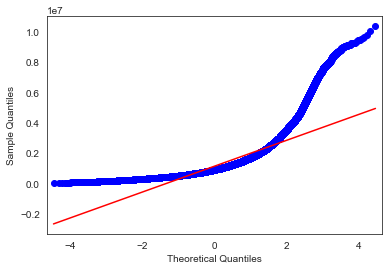

In [27]:
import statsmodels.api as sm
sm.qqplot(train['Avg_Account_Balance'], line ="s")
plt.show()

## Univariate Analysis : Categorical variables

In [28]:
# custom function for easy and efficient analysis of categorical univariate

def UVA_category(data, var_group):


  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

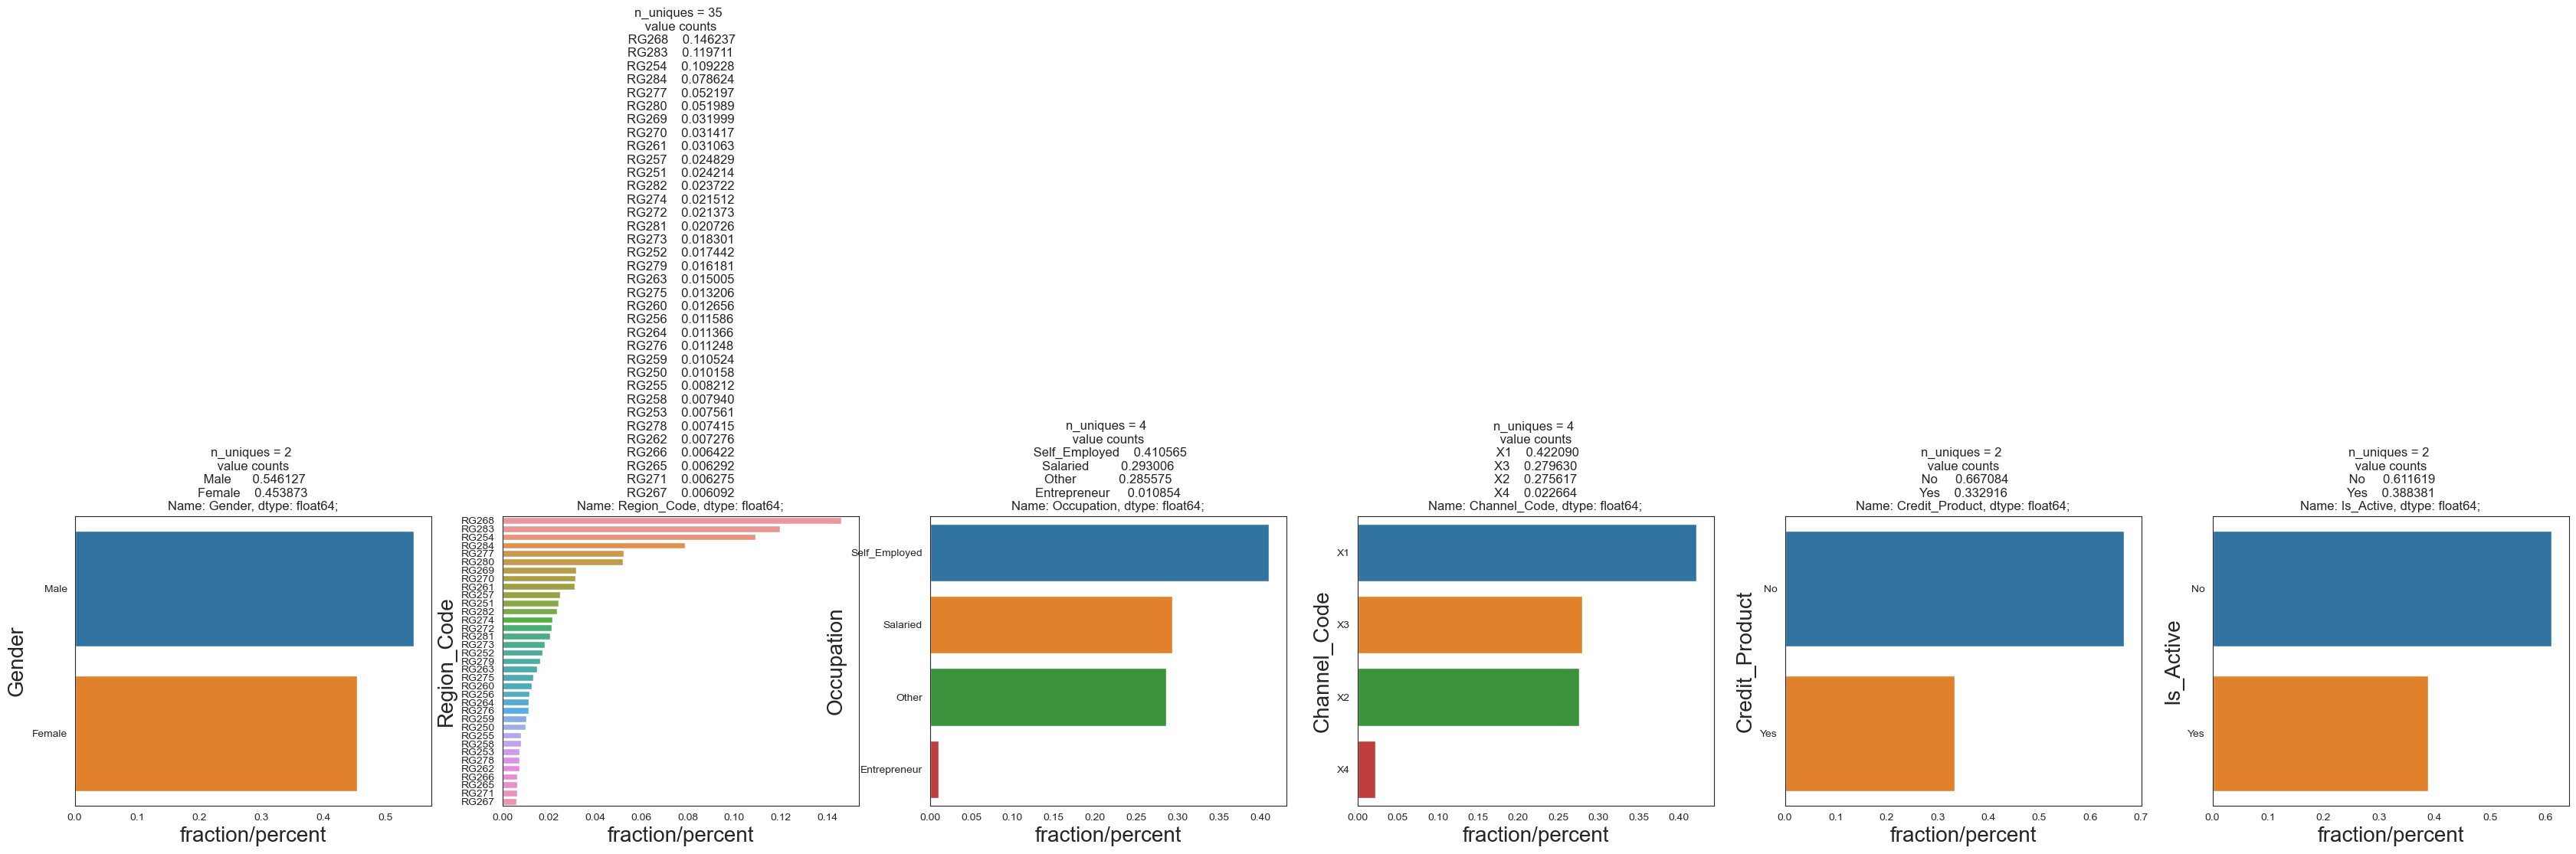

In [29]:
UVA_category(train, ohe_feat) # categorical variables

## 1. Gender

In [30]:
#distribution of gender
train['Gender'].value_counts(normalize=True)

Male      0.546127
Female    0.453873
Name: Gender, dtype: float64

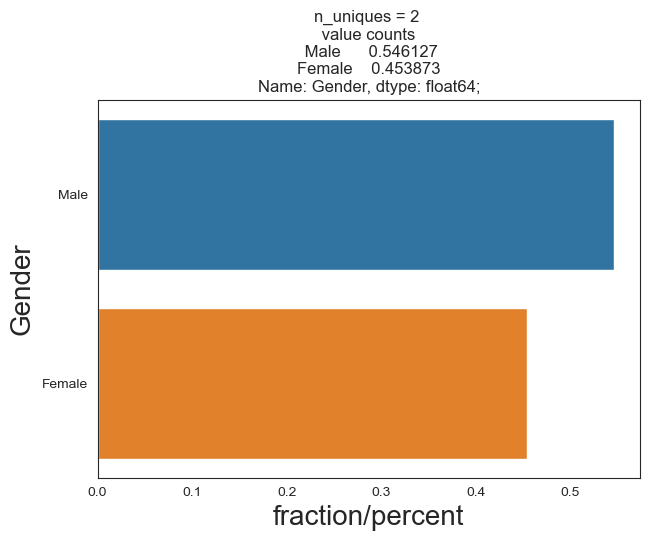

In [31]:
UVA_category(train, ["Gender"]) #Detailed exploration of gender

## Summary of Gender

* Approximately 45% of customers are Females and 55% customers are Males


## 2. Region_Code

In [32]:
#distribution of Region_Code

train['Region_Code'].value_counts(normalize=True)

RG268    0.146237
RG283    0.119711
RG254    0.109228
RG284    0.078624
RG277    0.052197
RG280    0.051989
RG269    0.031999
RG270    0.031417
RG261    0.031063
RG257    0.024829
RG251    0.024214
RG282    0.023722
RG274    0.021512
RG272    0.021373
RG281    0.020726
RG273    0.018301
RG252    0.017442
RG279    0.016181
RG263    0.015005
RG275    0.013206
RG260    0.012656
RG256    0.011586
RG264    0.011366
RG276    0.011248
RG259    0.010524
RG250    0.010158
RG255    0.008212
RG258    0.007940
RG253    0.007561
RG278    0.007415
RG262    0.007276
RG266    0.006422
RG265    0.006292
RG271    0.006275
RG267    0.006092
Name: Region_Code, dtype: float64

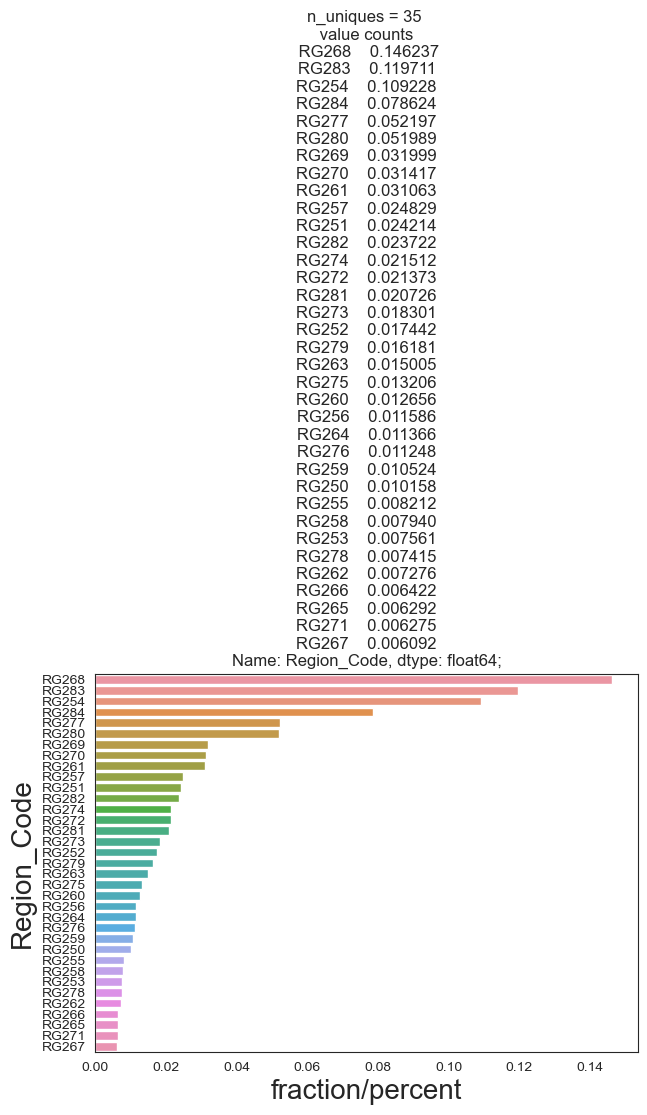

In [33]:
UVA_category(train, ["Region_Code"])

## Summary of Region_Code

* Only a few have significant presence, might result in sparse matrix

## 3. Occupation

In [34]:
#distribution of Occupation

train['Occupation'].value_counts(normalize=True)

Self_Employed    0.410565
Salaried         0.293006
Other            0.285575
Entrepreneur     0.010854
Name: Occupation, dtype: float64

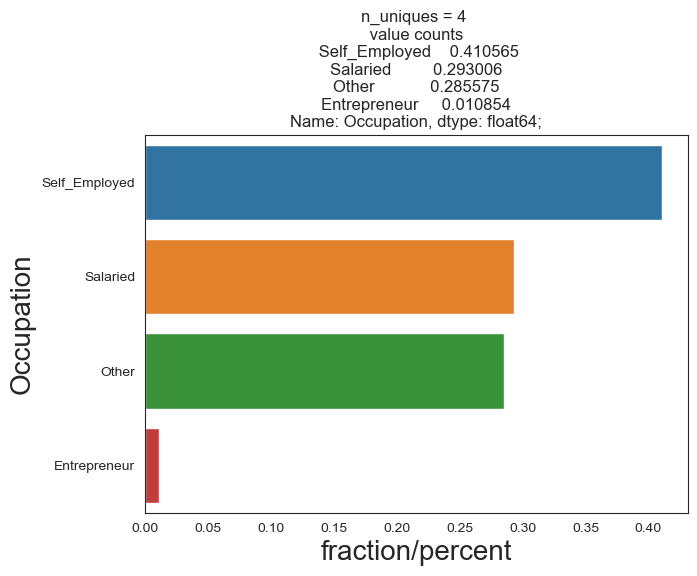

In [35]:
UVA_category(train, ["Occupation"])

## Summary of Occupation
* 41% are self employed followed by salaried and others
* Entrepreneurs are only 1% of customers

## 4. Channel_Code


In [36]:
#distribution of hypertension
train['Channel_Code'].value_counts(normalize=True)

X1    0.422090
X3    0.279630
X2    0.275617
X4    0.022664
Name: Channel_Code, dtype: float64

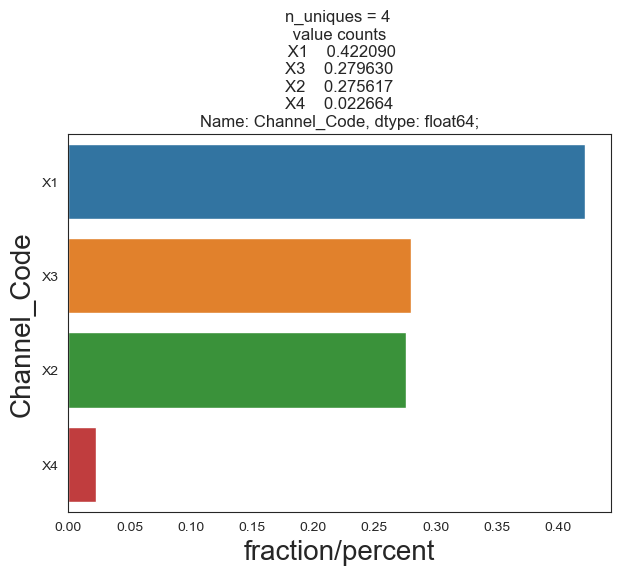

In [37]:
UVA_category(train, ["Channel_Code"])

## Summary of Channel_Code
* Through X1, 42.20% of customers are acquired
* Through X3, 27.96%o of customers are acquired
* Through X2, 27.56% of customers are acquired
* Through X4, 2.26% of customers are acquired


## 5. Credit_Product

In [38]:
#distribution of Credit_Product
train['Credit_Product'].value_counts(normalize=True)

No     0.667084
Yes    0.332916
Name: Credit_Product, dtype: float64

### Univariate: Missing Values (Credit_Product)

## Summary of Credit_Product
* Approximately 33 % of customers had Credit_Products and 66% dont

In [39]:
missingdf= train[train['Credit_Product'].isna()] # Exploring Missing rows of Credit_Product
missingdf

ID  Gender  Age Region_Code     Occupation Channel_Code  \
6       ETQCZFEJ    Male   62       RG282          Other           X3   
15      UJ2NJKKL    Male   33       RG268  Self_Employed           X2   
31      ABPMK4WU  Female   32       RG279       Salaried           X4   
36      MTEIXMB9  Female   41       RG268  Self_Employed           X3   
40      6WX9JDVK  Female   63       RG254          Other           X3   
...          ...     ...  ...         ...            ...          ...   
245684  WVJFPREY  Female   51       RG281   Entrepreneur           X3   
245694  WIZBXYQZ  Female   50       RG277  Self_Employed           X2   
245699  MARTXU7T    Male   53       RG254          Other           X2   
245714  KSCFGXV3  Female   46       RG268  Self_Employed           X2   
245720  BPAWWXZN    Male   51       RG284  Self_Employed           X3   

        Vintage Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
6            20            NaN              1056750       Yes        1  
15           69            NaN               517063       Yes        1  
31           15            NaN              1072850       Yes        1  
36           62            NaN               962383        No        1  
40          103            NaN              1249319       Yes        1  
...         ...            ...                  ...       ...      ...  
245684       99            NaN               552992        No        1  
245694       92            NaN              1385124        No        1  
245699       19            NaN              1141825       Yes        1  
245714       19            NaN               993195        No        1  
245720      109            NaN              1925586        No        0  

[29325 rows x 11 columns]

- We observed that 29325 values are missing from Credit_Product column.


In [40]:
# Showing records where customers interested in creditcard but had missing value in Credit_Product attribute
train[train['Credit_Product'].isna() & train['Is_Lead'] == 1]

ID  Gender  Age Region_Code     Occupation Channel_Code  \
6       ETQCZFEJ    Male   62       RG282          Other           X3   
15      UJ2NJKKL    Male   33       RG268  Self_Employed           X2   
31      ABPMK4WU  Female   32       RG279       Salaried           X4   
36      MTEIXMB9  Female   41       RG268  Self_Employed           X3   
40      6WX9JDVK  Female   63       RG254          Other           X3   
...          ...     ...  ...         ...            ...          ...   
245683  9VFKEFOS    Male   71       RG283          Other           X3   
245684  WVJFPREY  Female   51       RG281   Entrepreneur           X3   
245694  WIZBXYQZ  Female   50       RG277  Self_Employed           X2   
245699  MARTXU7T    Male   53       RG254          Other           X2   
245714  KSCFGXV3  Female   46       RG268  Self_Employed           X2   

        Vintage Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
6            20            NaN              1056750       Yes        1  
15           69            NaN               517063       Yes        1  
31           15            NaN              1072850       Yes        1  
36           62            NaN               962383        No        1  
40          103            NaN              1249319       Yes        1  
...         ...            ...                  ...       ...      ...  
245683       13            NaN               492873        No        1  
245684       99            NaN               552992        No        1  
245694       92            NaN              1385124        No        1  
245699       19            NaN              1141825       Yes        1  
245714       19            NaN               993195        No        1  

[24975 rows x 11 columns]

- We observed that out of 29325 missing values, 24975 are interested on creditcard

## 6. Is_Active

In [41]:
train['Is_Active'].value_counts(normalize=True)

No     0.611619
Yes    0.388381
Name: Is_Active, dtype: float64

## Summary of Is_Active

* Approximately 38 % of customers is Active for last 3 Months and 61% not active

## Summary : UVA


The Train dataset is an imbalanced dataset where above 75% are Zero value

- Summary of Age
 - Mean age = 43.85
 - Median age = 43
 - most customers are in between 23 and 85
 - skewness = +0.62 positively skewed
 - Kurtosis =-0.44, less exreme value presence
 

- Summary of Vintage
 - Mean Vintage = 46.95 months
 - Median Vintage = 32 months
 - most customers are in between 7 and 135 months
 - skewness = +0.79 positively skewed
 - Kurtosis =-0.7, less exreme value presence
 

- Summary of Avg_Account_Balance
 - Mean Avg_Account_Balance = 11.28 lakhs
  - Median Avg_Account_Balance = 8.94 lakhs
  - most customers are in between 20k and 10 Million
  - skewness = +0.2.97 very positively skewed
  - Kurtosis = +14.3, exreme value presence


- Summary of Gender
 - Approximately 45% of customers are Females and 55% customers are Males
- Summary of Region_Code
 - Only a few have significant presence, might result in sparse matrix, better create new column "Region_Code_others" for non significant Region_Codes

- Summary of Occupation
 - nearly half are self employed followed by salaried and others
 - Entrepreneurs are only 1% of customers

- Summary of Channel_Code
 - Through X1, 42.20% of customers are acquired
 - Through X3, 27.96%o of customers are acquired
 - Through X2, 27.56% of customers are acquired
 - Through X4, 02.26% of customers are acquired

- Summary of Credit_Product
 - Approximately 33 % of customers had Credit_Products and 66% dont

- Summary of Is_Active
 - Approximately 38 % of customers is Active in last 3 Months and 61% not active


- We observed that 29325 values are missing from Credit_Product column.
 - We observed that out of 29325 missing values, 24975 are interested on creditcard


__Things to investigate__

Credit_Product: Do the customers with missing Credit_Product values have some common behaviour with Is_Lead


----------

## Bivariate Analysis : Numerical-Numerical

In [42]:
# isolating numerical datatypes
numerical = train.select_dtypes(include=['int64'])
numerical= numerical.drop(["Is_Lead"], axis=1) # dropping Prediction column
numerical.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
dtype: object

## Correlation Matrix

In [43]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

Age   Vintage  Avg_Account_Balance
Age                  1.000000  0.631242             0.145232
Vintage              0.631242  1.000000             0.167433
Avg_Account_Balance  0.145232  0.167433             1.000000

## Heatmap Correlation

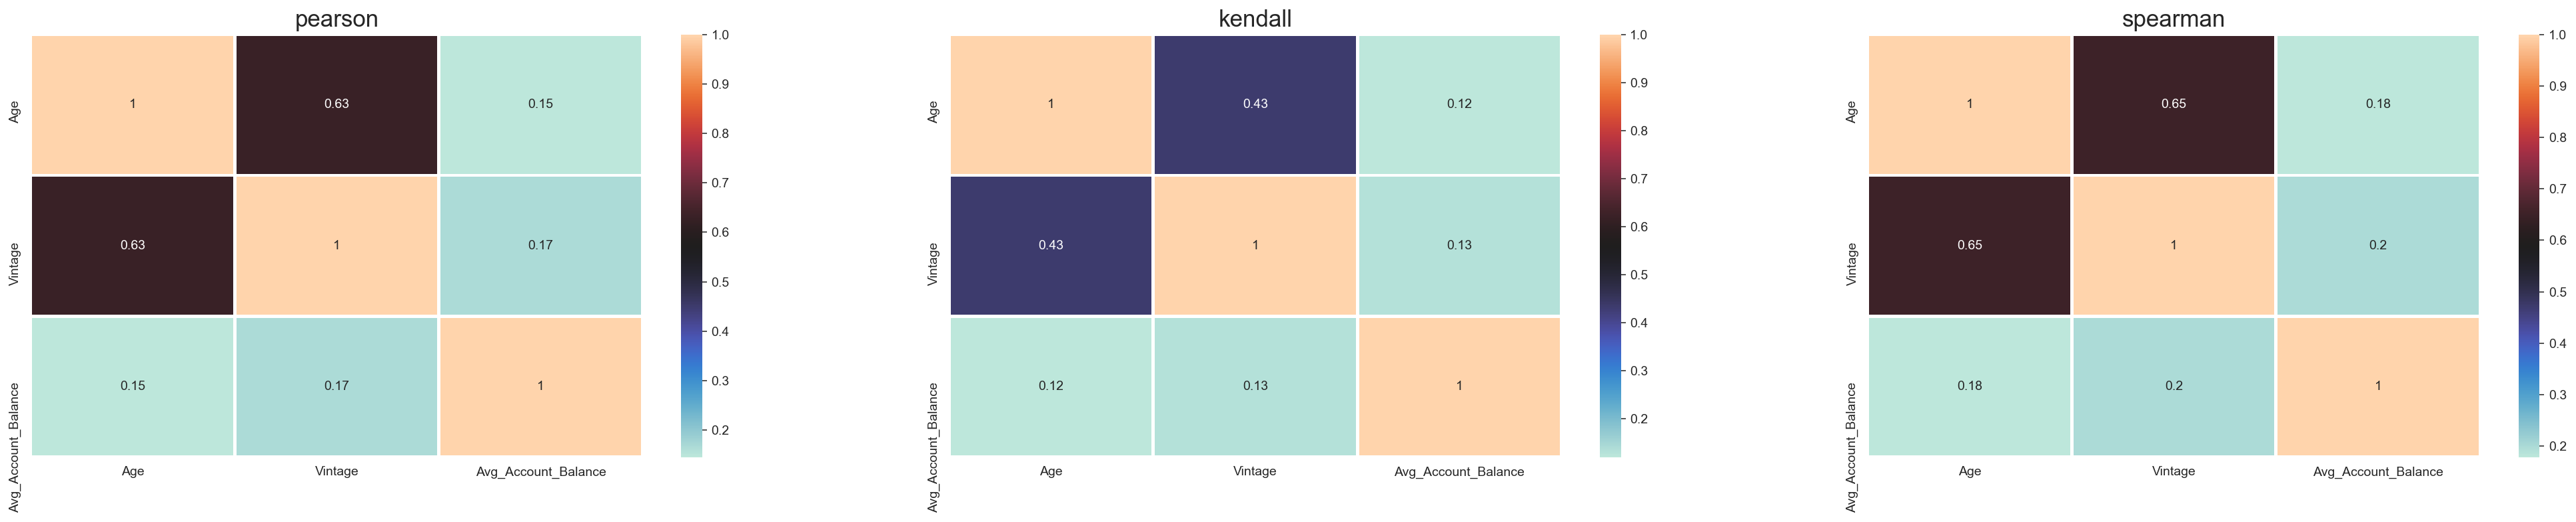

In [44]:
# plotting heatmap for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2, annot=True, cmap="icefire")
  plt.title(i, fontsize=18)



__Age has correlation with Vintage of 0.63 Pearson correlation__


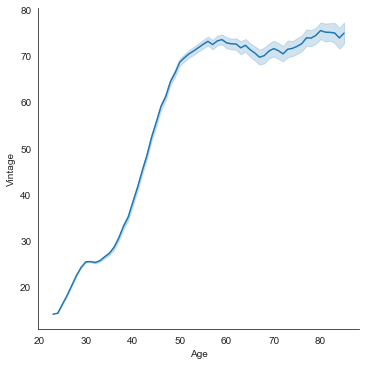

In [45]:
# Lineplot of Age with Vintage
sns.relplot(data=train, x="Age", y="Vintage", kind="line")

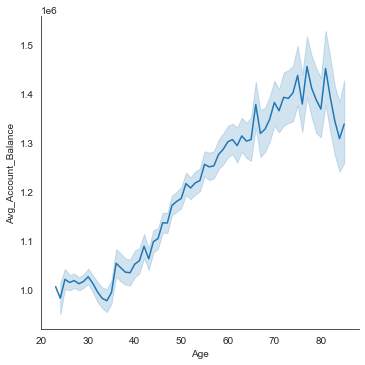

In [46]:
# Lineplot of Age with Avg_Account_Balance
sns.relplot(data=train, x="Age", y="Avg_Account_Balance", kind="line")

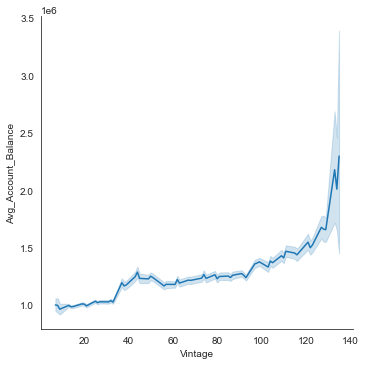

In [47]:
# Lineplot of Vintage with Avg_Account_Balance
sns.relplot(data=train, x="Vintage", y="Avg_Account_Balance", kind="line")

# Summary
- As Age increases, Vintage also increases
- As Age increases, Avg_Account_Balance also increases till approx 70 years, then decreases
- As Vintage increases, Avg_Account_Balance also increases


## Scatterplot

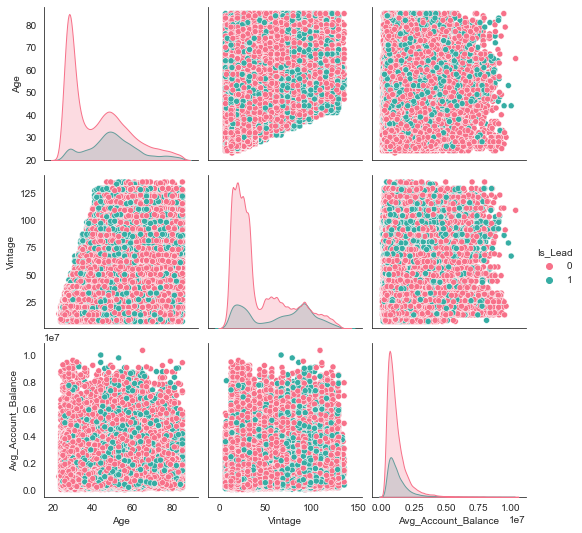

In [48]:
sns.pairplot(train, hue ='Is_Lead', palette='husl') # scatter plot for Numerical variables

-  

## Bivariate Analysis: Continuous-Categorical variables

List of investigation to perform under this combination.

1. Does Creditcard interest increase with Age ?
2. Does Creditcard interest increase with Vintage ?
3. Does Creditcard interest increase with Avg_Account_Balance ?

__Hypothesis__
 
- Young Age- Category  are more interested for the Credit Card
- High Vinatage category  are more interested for the Credit Card
- High Avg- Balance category  are more interested for the Credit Card


In [49]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [50]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [51]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

## 1. Does Creditcard interest increase with Age ?


In [52]:
# extracting age of people who are interested in creditcard
Lead_age= train[train['Is_Lead'] == 1]['Age']
Lead_age

6         62
15        33
16        46
17        59
20        44
          ..
245697    43
245699    53
245709    36
245713    41
245714    46
Name: Age, Length: 58288, dtype: int64

In [53]:
# calculating points of mean, median and standard deviation
mean = Lead_age.mean()
median = Lead_age.median()
stdev = Lead_age.mean()- Lead_age.std(), Lead_age.mean()+Lead_age.std() 

# checking
mean, median, stdev

(49.99394386494647, 49.0, (37.10952498381743, 62.87836274607552))

* The mean value of Age of customers is 43 and the mean value of Age of people who are interested in creditcard is around 49

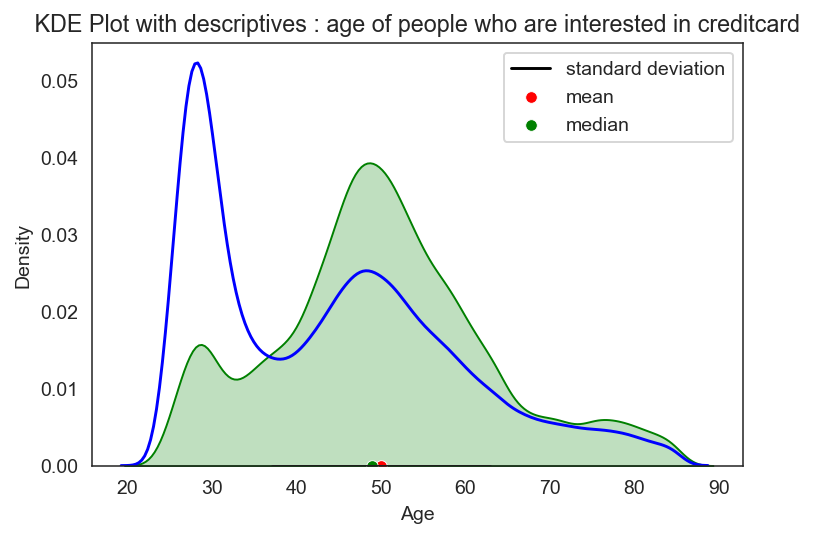

In [54]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(Lead_age, shade = True, color= "green")
sns.kdeplot(train["Age"], shade = False, color ="blue")
sns.scatterplot( [mean], [0], color='red', label='mean')
sns.scatterplot( [median], [0], color='green', label='median')
sns.lineplot( stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("Age")
plt.ylabel('Density')
plt.title(" KDE Plot with descriptives : age of people who are interested in creditcard ")
plt.show()


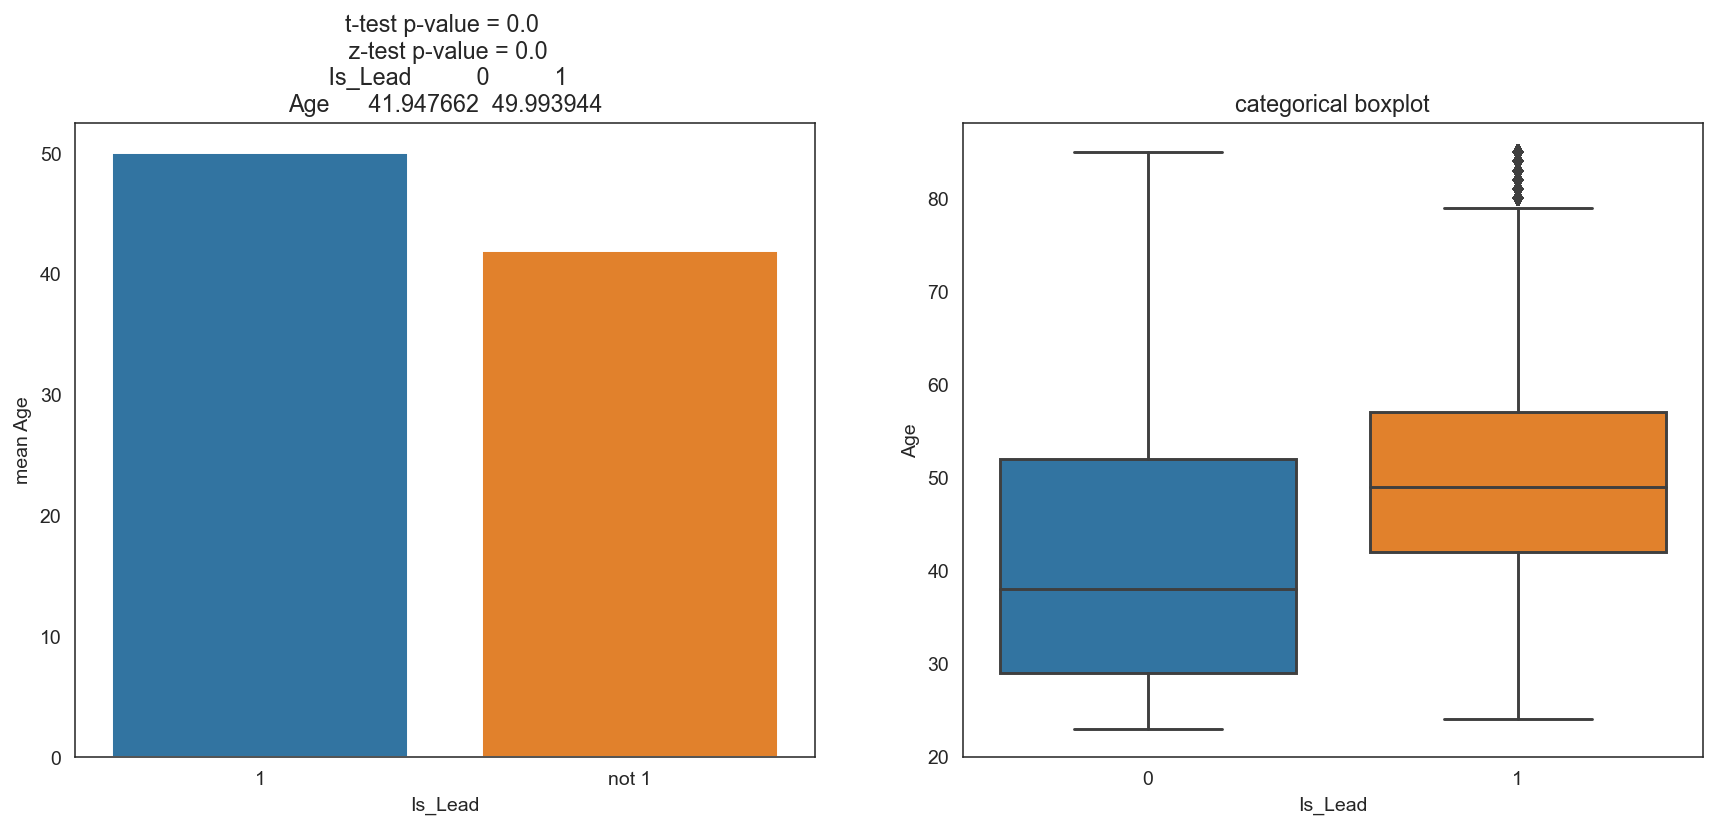

In [55]:
data =train
Bivariate_cont_cat(data, 'Age', 'Is_Lead', 1)

H0: Mean age of people who are interested in creditcard and who are not interested are not significantly different
* p value <.05, H0 is rejected.

### Inferences

We can safely _reject the hypothesis_ that Mean age of people who are interested in creditcard and who are not interested are not significantly different.

- with increase in Age, people are more interested in creditcard , results are significantly different.


## 2. Does Creditcard interest increase with Vintage ?


In [56]:
# extracting Vintage of people who are interested in creditcard

Lead_Vintage= train[train['Is_Lead'] == 1]['Vintage']
Lead_Vintage

6         20
15        69
16        97
17        15
20        19
          ..
245697    50
245699    19
245709    15
245713    13
245714    19
Name: Vintage, Length: 58288, dtype: int64

In [57]:
# calculating points of mean, median and standard deviation
mean = Lead_Vintage.mean()
median = Lead_Vintage.median()
stdev = Lead_Vintage.mean()- Lead_Vintage.std(), Lead_Vintage.mean()+Lead_Vintage.std() 
# checking
mean, median, stdev

(63.18307370299204, 69.0, (28.899776883798083, 97.466370522186))

* The mean value of Vintage of customers is 46 and the mean value of Vintage of people who are interested in creditcard is around 63

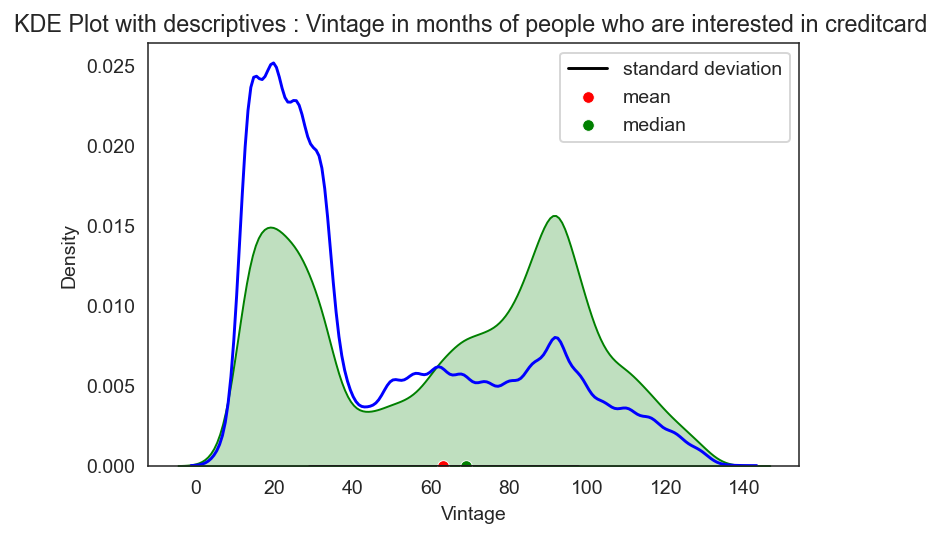

In [58]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(Lead_Vintage, shade = True, color = "green")
sns.kdeplot(train["Vintage"], shade = False, color ="blue")
sns.scatterplot( [mean], [0], color='red', label='mean')
sns.scatterplot( [median], [0], color='green', label='median')
sns.lineplot( stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("Vintage")
plt.ylabel('Density')
plt.title("KDE Plot with descriptives : Vintage in months of people who are interested in creditcard ")
plt.show()

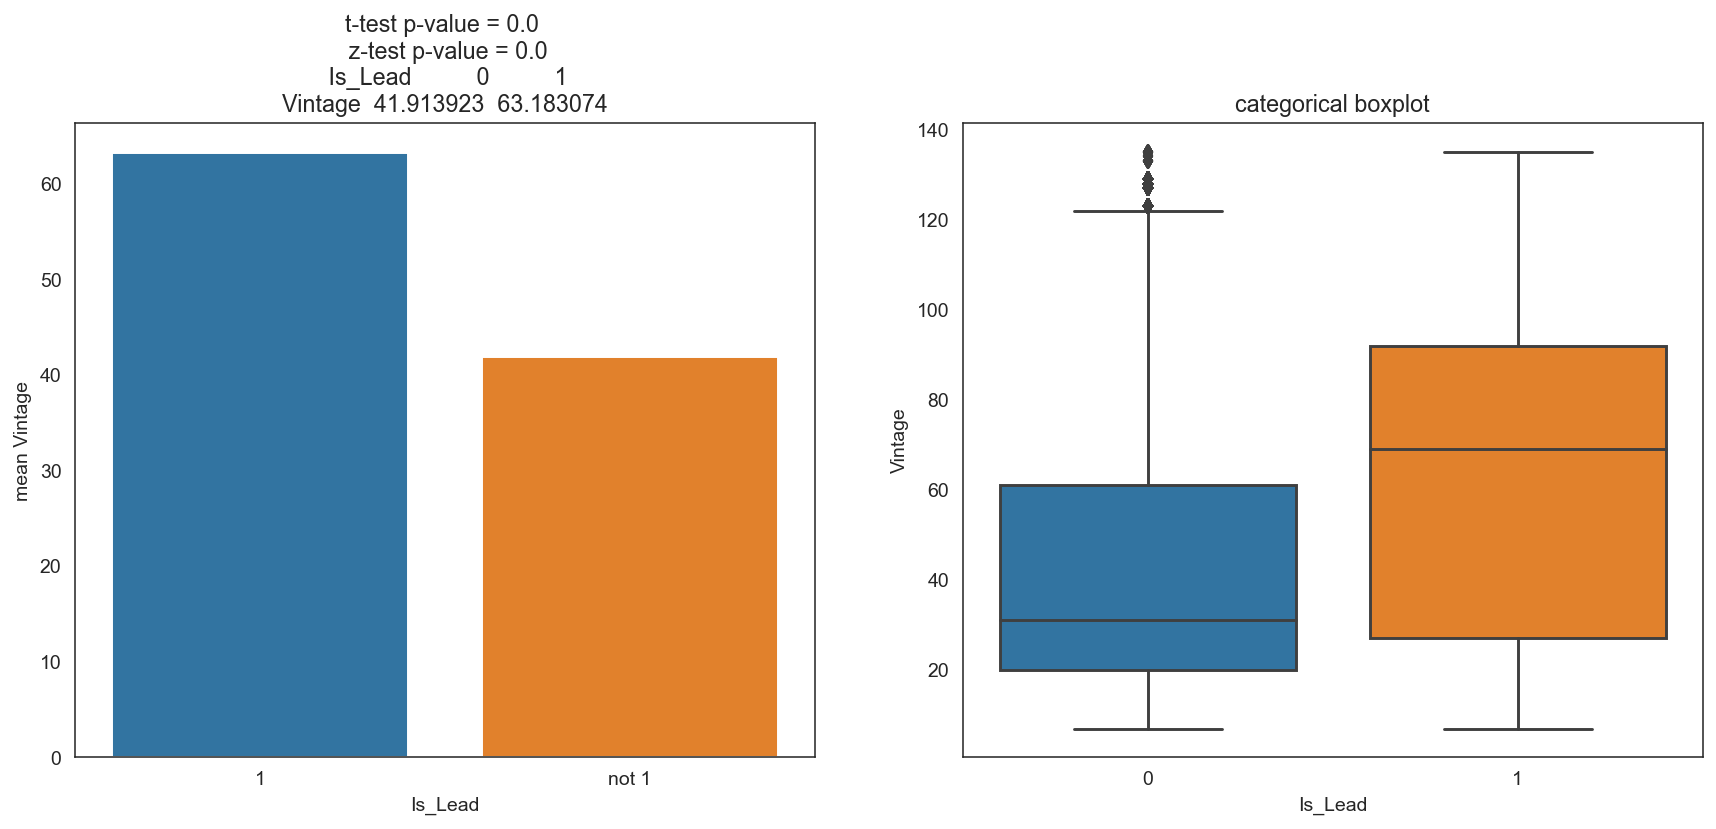

In [59]:
data =train
Bivariate_cont_cat(data, 'Vintage', 'Is_Lead', 1)

H0: Mean Vintage of people who are interested in creditcard and who are not interested are not significantly different
* p value <.05, H0 is rejected.


### Inferences

We can safely _reject the hypothesis_ that Vintage of people who are interested in creditcard and who are not interested are not significantly different.

- with increase in Vintage, people are more interested in creditcard , results are significantly different.

## 3. Does Creditcard interest increase with Avg_Account_Balance ?

In [60]:
# extracting Avg_Account_Balance of people who are interested in creditcard

Lead_Avg_Account_Balance= train[train['Is_Lead'] == 1]['Avg_Account_Balance']
Lead_Avg_Account_Balance

6         1056750
15         517063
16        2282502
17        2384692
20        1001650
           ...   
245697     551203
245699    1141825
245709     608110
245713     898170
245714     993195
Name: Avg_Account_Balance, Length: 58288, dtype: int64

In [61]:
# calculating points of mean, median and standard deviation
mean = Lead_Avg_Account_Balance.mean()
median = Lead_Avg_Account_Balance.median()
stdev = Lead_Avg_Account_Balance.mean()- Lead_Avg_Account_Balance.std(), Lead_Avg_Account_Balance.mean()+Lead_Avg_Account_Balance.std() 

# checking
mean, median, stdev

(1210034.0418954159, 981598.5, (344081.2350724363, 2075986.8487183955))

* The mean Avg_Account_Balance of customers is 11.28 lakhs and the mean Avg_Account_Balance of people who are interested in creditcard is around 12.10 lakhs


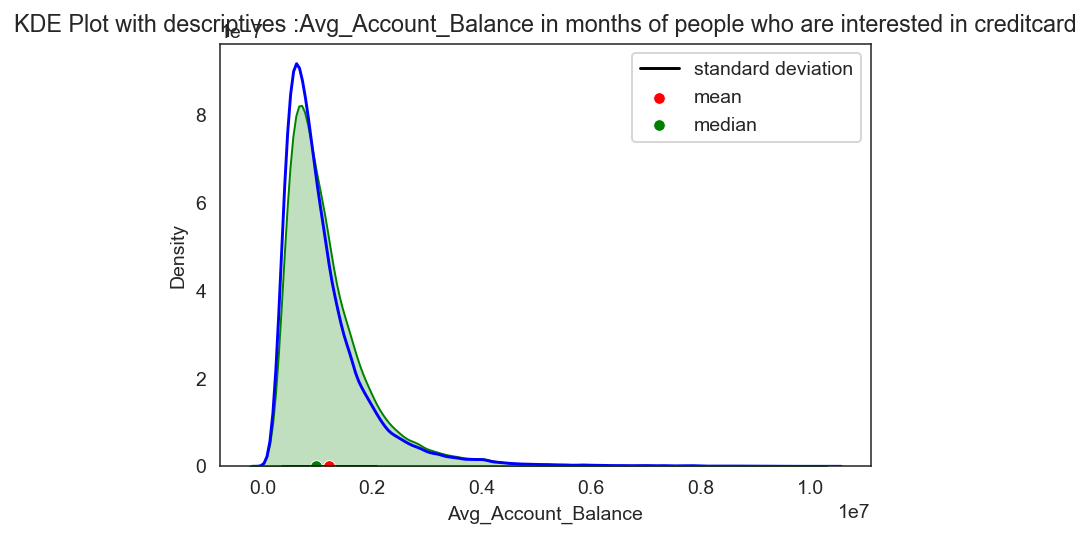

In [62]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(Lead_Avg_Account_Balance, shade = True, color= "green")
sns.kdeplot(train["Avg_Account_Balance"], shade = False, color ="blue")

sns.scatterplot( [mean], [0], color='red', label='mean')
sns.scatterplot( [median], [0], color='green', label='median')
sns.lineplot( stdev, [0,0], color='black', label='standard deviation')
plt.xlabel("Avg_Account_Balance")
plt.ylabel('Density')
plt.title("KDE Plot with descriptives :Avg_Account_Balance in months of people who are interested in creditcard")
plt.show()

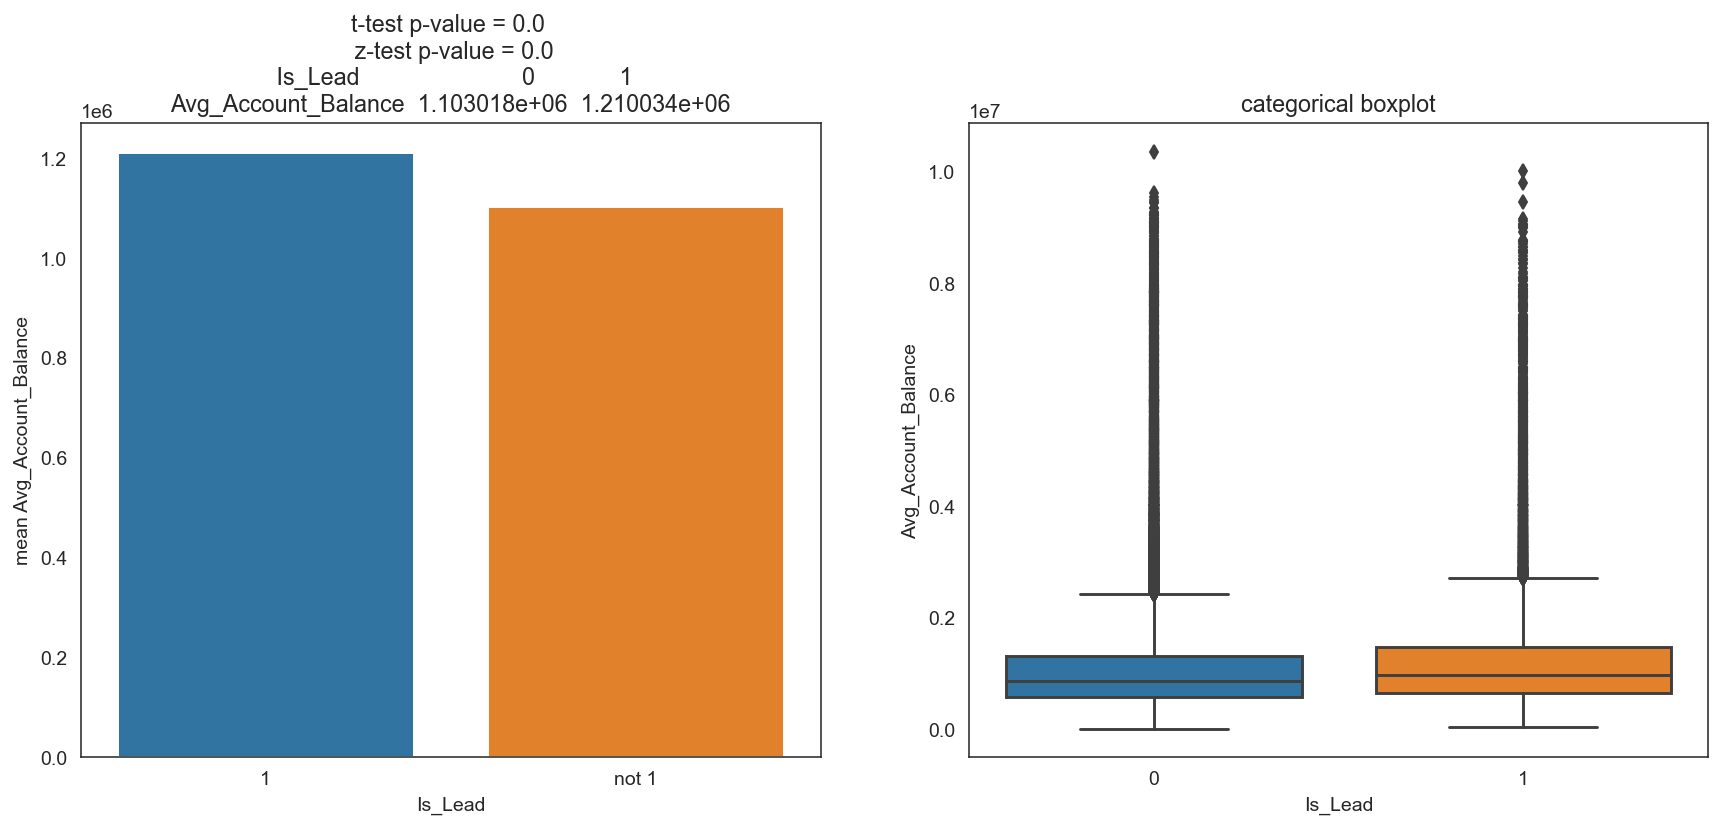

In [63]:
data =train
Bivariate_cont_cat(data, 'Avg_Account_Balance', 'Is_Lead', 1)

H0: Mean Avg_Account_Balance of people who are interested in creditcard and who are not interested are not significantly different
* p value <.05, H0 is rejected.


### Inferences

We can safely _reject the hypothesis_ that Avg_Account_Balance of people who are interested in creditcard and who are not interested are not significantly different

- with increase in Avg_Account_Balance, people are more interested in creditcard

#### Summary:-

- with increase in Age, people are more interested in creditcard
- with increase in Vintage, people are more interested in creditcard
- with increase in Avg_Account_Balance, people are more interested in creditcard


--------

## Bivariate : Categorical-Categorical

#### List of Hypothesis to check under this combination
1. Males more likely interested in creditcard than females
2. Salaried Occupation are more interested for the Credit Card
3. Channel_Code have an influence on interest for the Credit Card
4. Credit_Product =1 are more interested for the Credit Card
5. Is_Active = 1 are more interested for the Credit Card
6. young customers more interested for CreditCard
7. High vintage customers are more interested for CreditCard


**Missing Values** - finding behaviour
  *  Do missing values in Credit_Product have any relation with Is_Lead and other features


In [64]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

In [65]:
data= train

### 1. Males more likely interested in creditcard than females

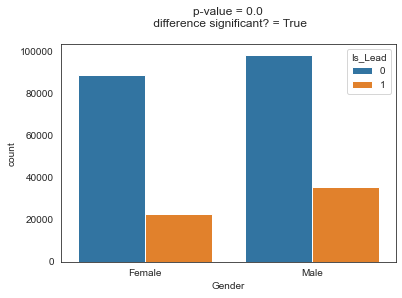

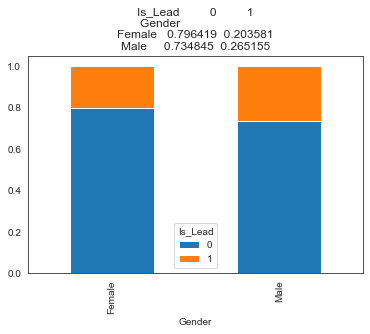

In [66]:
BVA_categorical_plot(data,'Is_Lead','Gender')

**Result**:
 Gender has significant effect on the interest for creditcard.
 - Male shows more interest

### 2. Salaried Occupation are more interested for the Credit Card

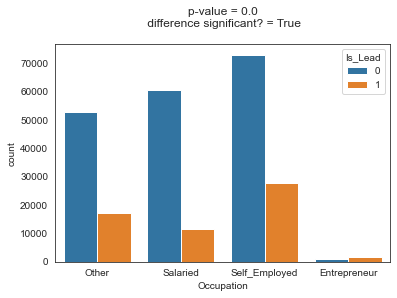

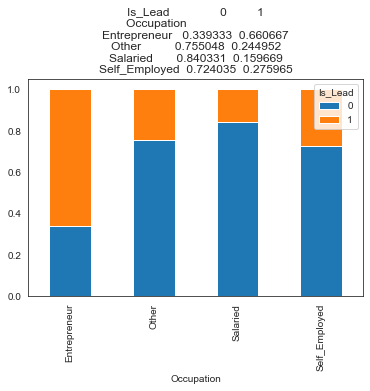

In [67]:
BVA_categorical_plot(data,'Is_Lead','Occupation')

**Result**:
- Occupation has significant effect on the interest for creditcard.
 - Entrepreneur shows more interest, followed by self_employed. 
 - salaried shows least interest, the hypothesis was wrong

### 3. Channel_Code have an influence on interest for the Credit Card

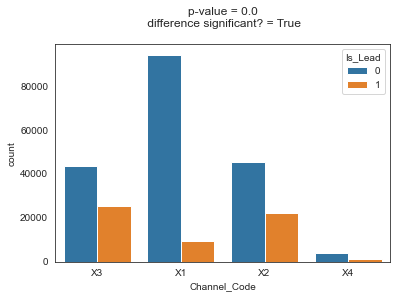

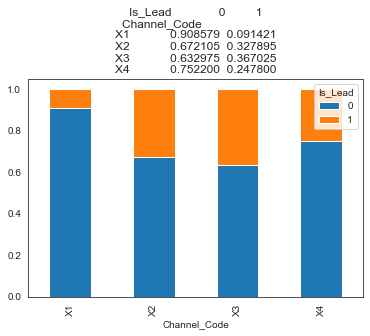

In [68]:
BVA_categorical_plot(data,'Is_Lead','Channel_Code')

**Result**:

- Channel_Code has significant effect on the interest for creditcard.
 - X3 shows more interest, followed by X2. 
 - X1 shows least interest

### 4. Credit_Product =1 are more interested for the Credit Card

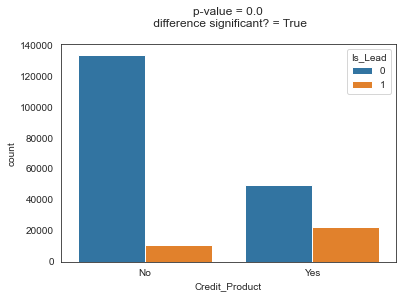

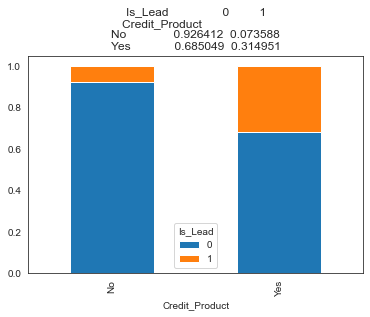

In [69]:
BVA_categorical_plot(data,'Is_Lead','Credit_Product')

**Result**:

- Credit_Product has significant effect on the interest for creditcard.
 - Credit_Product =1 shows more interest

### 5. Is_Active = 1 are more interested for the Credit Card

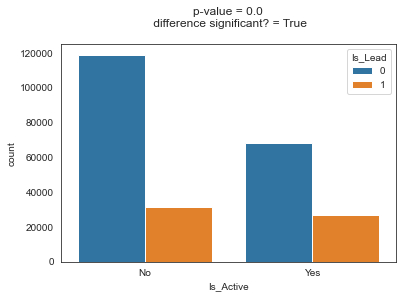

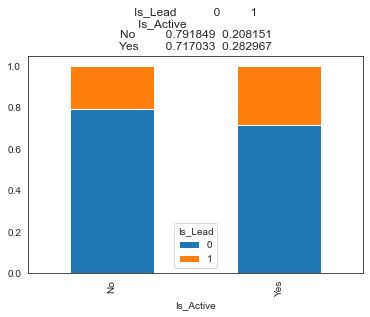

In [70]:
BVA_categorical_plot(data,'Is_Lead','Is_Active')

**Result**:

- Is_Active has significant effect on the interest for creditcard.
 - Is_Active =1 shows more interest

### 6. Are young customers more interested on CreditCard

In [71]:
# segregating customers into segments
Lead = data[['Is_Lead','Age']][:]
Lead['age_group'] = 'str'
Lead['age_group'][Lead['Age']>=70] = 'very old'
Lead['age_group'][(Lead['Age']<70) & (Lead['Age']>=60)] = 'senior citizen'
Lead['age_group'][(Lead['Age']<60) & (Lead['Age']>=50)] = 'fiftys'
Lead['age_group'][(Lead['Age']<50) & (Lead['Age']>=40)] = 'fourtys'
Lead['age_group'][(Lead['Age']<40) & (Lead['Age']>=30)] = 'thirtys'
Lead['age_group'][(Lead['Age']<30) & (Lead['Age']>=18)] = 'young'
Lead['age_group'][Lead['Age']<18] = 'Teen'

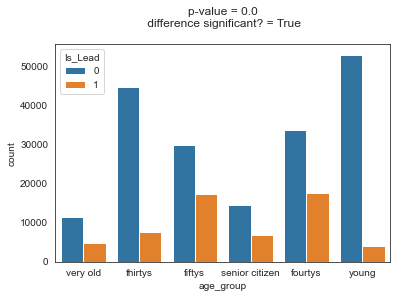

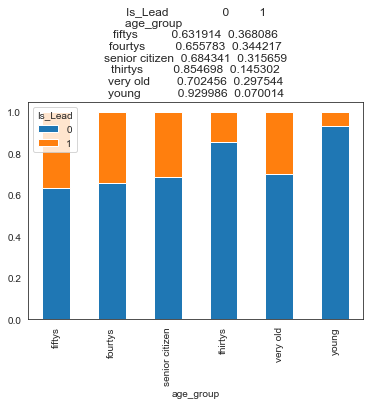

In [72]:
BVA_categorical_plot(Lead, 'Is_Lead', 'age_group')

**Result**:
Age group has significant effect on the interest for creditcard.
- Fiftys, fourtys, Senior citizens and Very old are more interested meanwhile  young and thirtys are the least.
- The hypothesis was wrong

### 7. High vintage customers are more interested for CreditCard


In [73]:
# segregating Vintage into categories
Vintage = data[['Is_Lead','Vintage']][:]
Vintage['vin_group'] = 'str'
Vintage['vin_group'][Vintage['Vintage']>=140] = 'Diamond'
Vintage['vin_group'][(Vintage['Vintage']<140) & (Vintage['Vintage']>=120)] = 'Platinum'
Vintage['vin_group'][(Vintage['Vintage']<120) & (Vintage['Vintage']>=100)] = 'Gold'
Vintage['vin_group'][(Vintage['Vintage']<100) & (Vintage['Vintage']>=80)] = 'silver'
Vintage['vin_group'][(Vintage['Vintage']<80) & (Vintage['Vintage']>=60)] = 'Bronze'
Vintage['vin_group'][(Vintage['Vintage']<60) & (Vintage['Vintage']>=40)] = 'Iron'
Vintage['vin_group'][(Vintage['Vintage']<40) & (Vintage['Vintage']>=20)] = 'copper'
Vintage['vin_group'][Vintage['Vintage']<20] = 'Nickel'

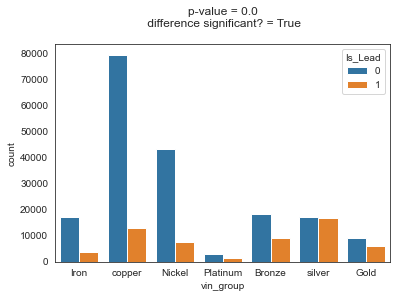

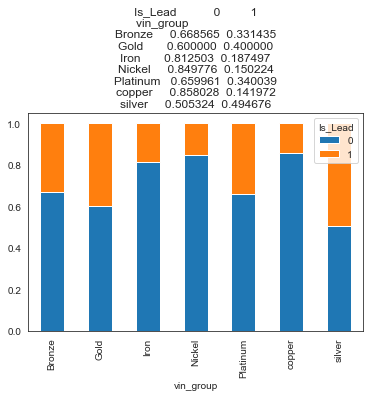

In [74]:
BVA_categorical_plot(Vintage, 'Is_Lead', 'vin_group')

**Result**:
Vintage group has significant effect on the interest for creditcard.
- Customers of Vintage 80-140 months are more interested meanwhile less than 20 and 20-60 are the least interested.
- The hypothesis was right

------

### Exploring Credit_Product relation with other variables

* Do Credit_Product have any relation with Is_Lead?
* Do Credit_Product have any relation with Gender?
* Do Credit_Product have any relation with Region_Code?
* Do Credit_Product have any relation with Occupation?
* Do Credit_Product have any relation with Channel_Code?
* Do Credit_Product have any relation with Is_Active?


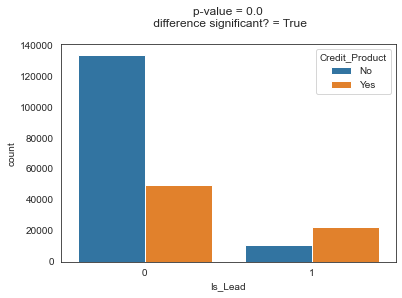

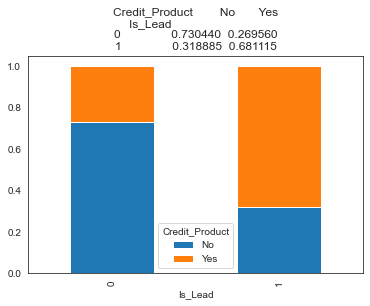

In [75]:
# Relation of Credit_Product with Is_Lead
BVA_categorical_plot(data,'Credit_Product', 'Is_Lead')

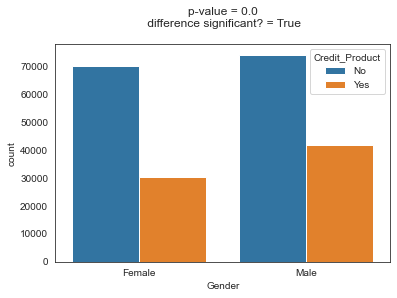

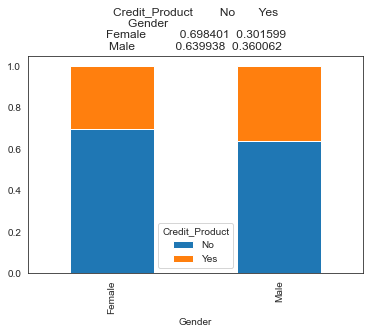

In [76]:
# Relation of Credit_Product with Gender
BVA_categorical_plot(data,'Credit_Product', 'Gender')

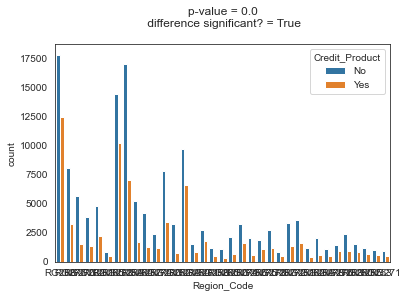

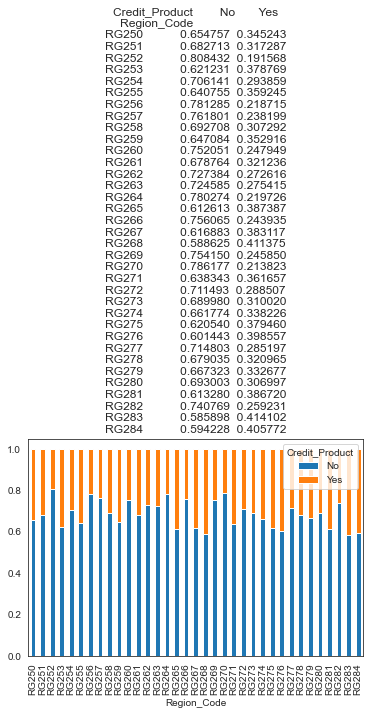

In [77]:
# Relation of Credit_Product with Region_Code
BVA_categorical_plot(data,'Credit_Product', 'Region_Code')

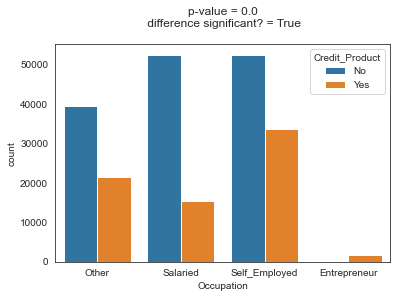

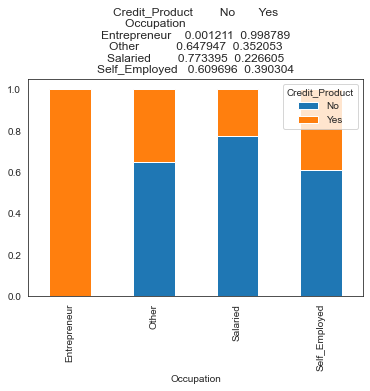

In [78]:
# Relation of Credit_Product with Occupation
BVA_categorical_plot(data,'Credit_Product', 'Occupation')

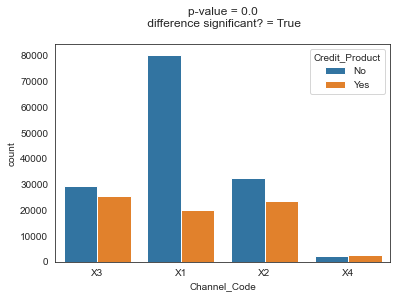

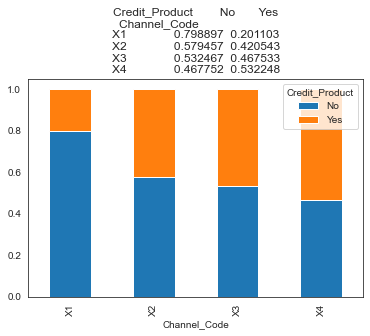

In [79]:
# Relation of Credit_Product with Channel_Code
BVA_categorical_plot(data,'Credit_Product', 'Channel_Code')

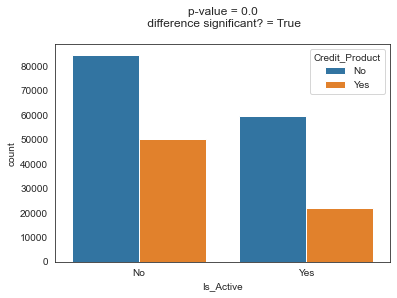

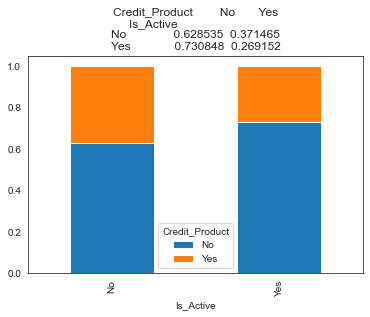

In [80]:
# Relation of Credit_Product with Is_Active
BVA_categorical_plot(data,'Credit_Product', 'Is_Active')

### Missing Values : Credit_Product

* Credit_Products have significant relation with Is_Lead
 - when Credit_Product= Yes, chance for Is_Lead is very high

* Credit_Product have significant relation with Gender. for males are more interested
* Credit_Product have relation with Occupation. almost all Entreprenuers are interested. followed by other and self employed
* Credit_Product have relation with Channel_Code and most significant with X4, X3, X2
* Credit_Product have relation with Is_Active and inactive customers are  more interested than active ones

-------

### Missing Values : Credit_Product

* Do missing values of Credit_Product have any relation with Gender?
* Do missing values of Credit_Product have any relation with Region_Code?
* Do missing values of Credit_Product have any relation with Occupation?
* Do missing values of Credit_Product have any relation with Channel_Code?
* Do missing values of Credit_Product have any relation with Is_Active?


<AxesSubplot:>

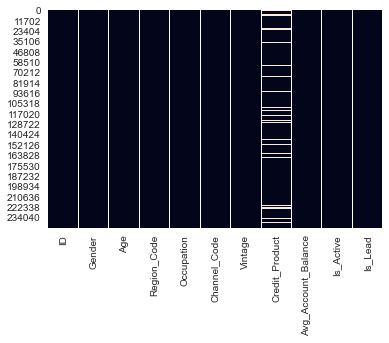

In [81]:
sns.heatmap(train.isna(), cbar=False)

<AxesSubplot:>

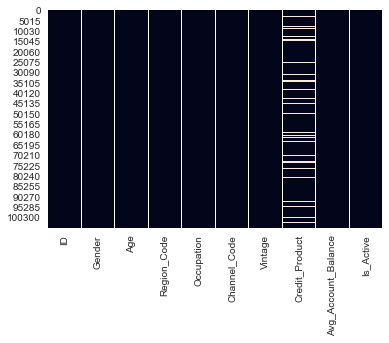

In [82]:
sns.heatmap(test.isna(), cbar=False)

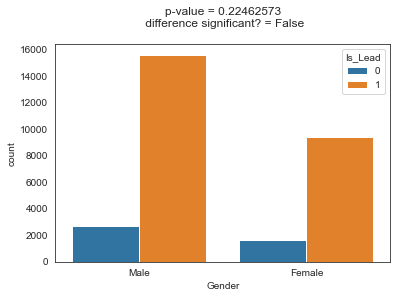

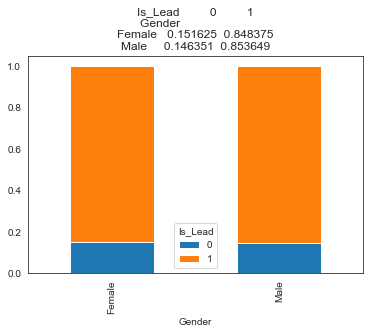

In [83]:
# Relation of Credit_Product missing values with Gender
BVA_categorical_plot(missingdf,'Is_Lead','Gender' )

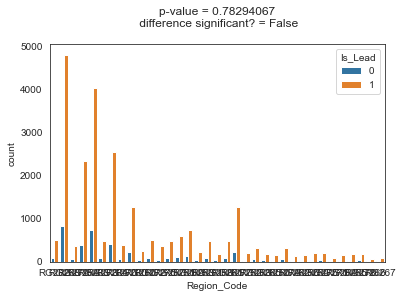

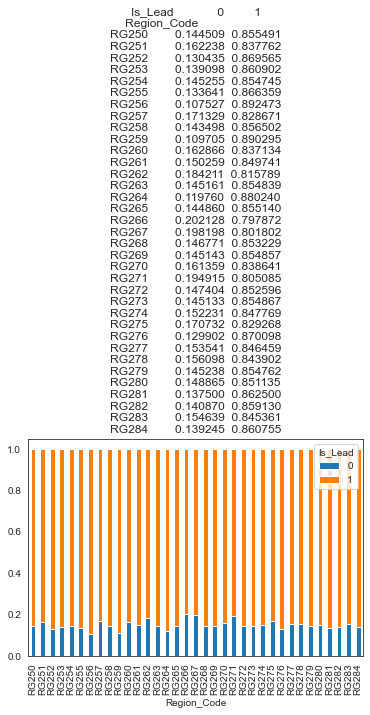

In [84]:
# Relation of Credit_Product missing values with Region_Code
BVA_categorical_plot(missingdf,'Is_Lead','Region_Code' )

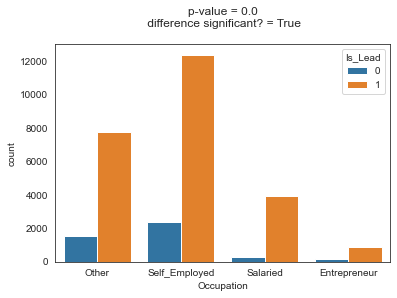

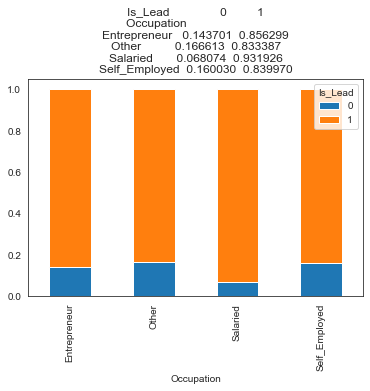

In [85]:
# Relation of Credit_Product missing values with Occupation
BVA_categorical_plot(missingdf,'Is_Lead','Occupation' )

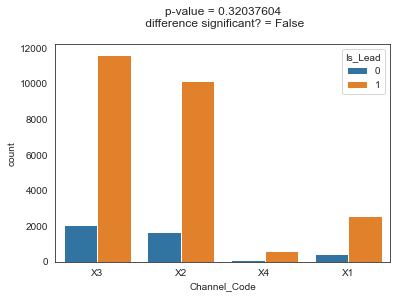

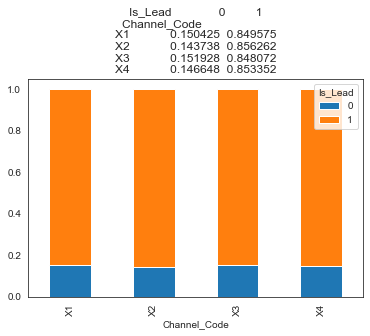

In [86]:
# Relation of Credit_Product missing values with Channel_Code
BVA_categorical_plot(missingdf,'Is_Lead','Channel_Code' )

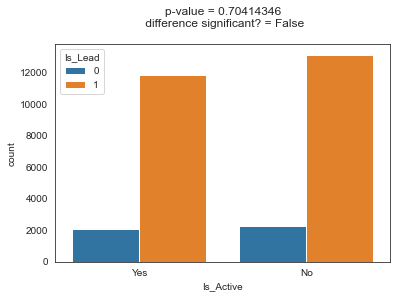

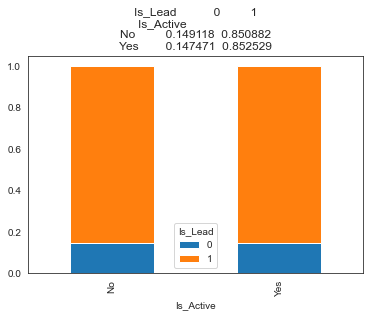

In [87]:
# Relation of Credit_Product missing values with Is_Active
BVA_categorical_plot(missingdf,'Is_Lead','Is_Active' )

In [88]:
# Missing values have significant correlation with Occupation

-----

# BVA Summary


- As Age increases, Vintage also increases. 
It has a very high correlation with Vintage of 0.63 Pearson correlation score
- As Vintage increases, Avg_Account_Balance also increases
- As Age increases, Avg_Account_Balance also increases till approx 70 years, then decreases

- with increase in Age, people are more interested in creditcard
- with increase in Vintage, people are more interested in creditcard
- with increase in Avg_Account_Balance, people are more interested in creditcard


- Gender has significant effect on the interest for creditcard.
 - Male shows more interest

- Occupation has significant effect on the interest for creditcard.
 - Entrepreneur shows more interest, followed by self_employed. 
 - salaried shows least interest, the hypothesis was wrong

- Channel_Code has significant effect on the interest for creditcard.
 - X3 shows more interest, followed by X2. 
 - X1 shows least interest

- Credit_Product has significant effect on the interest for creditcard.
 - Credit_Product =1 shows more interest

- Is_Active has significant effect on the interest for creditcard.
 - Is_Active =1 shows more interest

- Age group has significant effect on the interest for creditcard.
 - Fiftys, fourtys, Senior citizens and Very old are more interested meanwhile  young and thirtys are the least.

- Vintage group has significant effect on the interest for creditcard.
 - Customers of Vintage 80-140 months are more interested meanwhile less than 20 and 20-60 are the least interested.

- Credit_Product relation with other variables

* Credit_Products have significant relation with Is_Lead
 - when Credit_Product= Yes, chance for Is_Lead is very high

* Credit_Product have significant relation with Gender. for males are more interested
* Credit_Product have relation with Occupation. almost all Entreprenuers are interested. followed by other and self employed
* Credit_Product have relation with Channel_Code and most significant with X4, X3, X2
* Credit_Product have relation with Is_Active and inactive customers are  more interested than active ones


- Missing values have significant correlation with Occupation


---------

## Multivariate Analysis 

### Pivot Table

### identifying the Is_Lead customers Profile using multiple categorical features.

### 1. Gender, Occupation, Credit_Product  with Is_Lead

In [89]:
train.pivot_table('Is_Lead', ['Gender', 'Occupation'], 'Credit_Product', aggfunc='mean')*100

Credit_Product              No        Yes
Gender Occupation                        
Female Entrepreneur   0.000000  55.065359
       Other          6.230665  27.402673
       Salaried       5.950551  22.102186
       Self_Employed  7.983867  31.981846
Male   Entrepreneur        NaN  53.519769
       Other          8.338095  32.451623
       Salaried       7.144445  32.568073
       Self_Employed  8.452815  33.707645

* Entrepreneurs who are interested on credit product are definitely interested for creditcards irrespctive of gender

### Gender, Age, Occupation with Interest on Creditcards

Let's use one continuous variable Age, and two categorical variables, Gender, and Occupation to derive insights related to profiles of customers who are interested on Creditcards
We will have to convert continuous variable into categorical variable for efficiently using Pivot Table. Here we are binning age into 4 intervals

In [90]:
Age = pd.cut(train['Age'], [20, 40, 60, 80, 100])
train.pivot_table('Is_Lead', ['Gender', Age], 'Occupation', aggfunc='mean')*100

Occupation        Entrepreneur      Other    Salaried  Self_Employed
Gender Age                                                          
Female (20, 40]      59.154930   6.362258    9.340500      15.926337
       (40, 60]      66.484716  41.854216   99.611198      30.006539
       (60, 80]            NaN  24.682692  100.000000      25.164690
       (80, 100]           NaN  31.387808         NaN            NaN
Male   (20, 40]      66.666667   8.128563   11.646505      18.342843
       (40, 60]      66.102757  41.115888   99.325179      31.000276
       (60, 80]            NaN  29.660536  100.000000      31.994460
       (80, 100]           NaN  34.966820         NaN            NaN

* We have created four bins for the age variable dividing age into 4 groups 20-40, 40-60, 60-80 and 80-100
- irrespective of gender,  salaried from 40-80 age are looking for creditcard
- irrespective of gender,  Entrepreneurs from 20-60 age are looking for creditcard




### Gender,Age,Occupation and Avg_Account_Balance with Creditcard interest

Let's dig deeper by using two continuous variables Age and Avg_Account_Balance and Two Categorical Variable Gender and Occupation and try to find out the insights related to Creditcard interest

In [91]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [92]:
balance = pd.qcut(train['Avg_Account_Balance'], 4)
train.pivot_table('Is_Lead', ['Gender', Age], [balance, 'Occupation'],aggfunc='mean')*100

Avg_Account_Balance (20789.999, 604310.0]                         \
Occupation                   Entrepreneur      Other    Salaried   
Gender Age                                                         
Female (20, 40]      62.500000             5.679563   8.982279     
       (40, 60]      65.625000             37.764606  99.418605    
       (60, 80]     NaN                    23.235294  100.000000   
       (80, 100]    NaN                    31.578947 NaN           
Male   (20, 40]      76.470588             7.317881   10.672719    
       (40, 60]      65.174129             35.892421  99.472296    
       (60, 80]     NaN                    26.678508  100.000000   
       (80, 100]    NaN                    32.471264 NaN           

Avg_Account_Balance               (604310.0, 894601.0]                         \
Occupation          Self_Employed         Entrepreneur      Other    Salaried   
Gender Age                                                                      
Female (20, 40]      14.689595     64.285714            6.577804   9.038295     
       (40, 60]      26.668870     68.674699            40.368272  100.000000   
       (60, 80]      27.642276    NaN                   24.400767  100.000000   
       (80, 100]    NaN           NaN                   29.357798 NaN           
Male   (20, 40]      18.057494     70.000000            8.752817   12.120041    
       (40, 60]      28.147939     64.037855            40.191587  99.804688    
       (60, 80]      29.602888    NaN                   28.931830  100.000000   
       (80, 100]    NaN           NaN                   31.034483 NaN           

Avg_Account_Balance               (894601.0, 1366666.0]             \
Occupation          Self_Employed          Entrepreneur      Other   
Gender Age                                                           
Female (20, 40]      15.660573     68.421053             6.250000    
       (40, 60]      28.857915     64.074074             43.314139   
       (60, 80]      18.881119    NaN                    24.879496   
       (80, 100]    NaN           NaN                    29.242820   
Male   (20, 40]      18.782552     61.904762             8.569016    
       (40, 60]      31.058049     66.736402             43.285199   
       (60, 80]      26.688103    NaN                    30.051813   
       (80, 100]    NaN           NaN                    37.875289   

Avg_Account_Balance                           (1366666.0, 10352009.0]  \
Occupation             Salaried Self_Employed            Entrepreneur   
Gender Age                                                              
Female (20, 40]      9.649953    16.326531     50.000000                
       (40, 60]      99.713467   30.810466     67.447917                
       (60, 80]      100.000000  22.051282    NaN                       
       (80, 100]    NaN         NaN           NaN                       
Male   (20, 40]      11.487651   18.124302     61.538462                
       (40, 60]      99.213836   32.325783     67.000000                
       (60, 80]      100.000000  34.986945    NaN                       
       (80, 100]    NaN         NaN           NaN                       

Avg_Account_Balance                                       
Occupation               Other    Salaried Self_Employed  
Gender Age                                                
Female (20, 40]      7.381371   10.061511   17.879518     
       (40, 60]      44.438265  99.368421   32.706721     
       (60, 80]      25.325504  100.000000  29.194631     
       (80, 100]     34.090909 NaN         NaN            
Male   (20, 40]      8.007537   12.582781   18.450646     
       (40, 60]      43.590664  99.052133   32.075788     
       (60, 80]      31.136000  100.000000  34.460888     
       (80, 100]     36.742934 NaN         NaN

* Entrepreneurs of age range 20-60, Others of age 40-60 and salaried of age 60-80 shows more creditcard interest

In [93]:
# Multivariate scatterplot 

<AxesSubplot:xlabel='Age', ylabel='Avg_Account_Balance'>

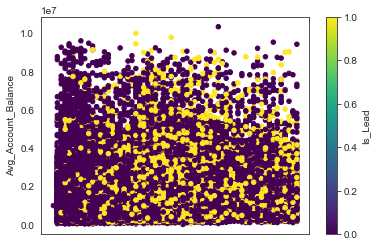

In [94]:
train.plot.scatter(x='Age', y='Avg_Account_Balance', c='Is_Lead', colormap='viridis')

# Box Plot 

Now in order to comply with our objective of identifying Creditcard customers profile, we will use grouped Box plot.

In [95]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')


### Age, Occupation, Is_Lead

We are using one continuous variable Age and one categorical variable Occupation to derive insights related to Creditcard customers profile

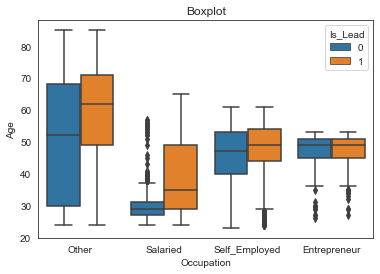

In [96]:
Grouped_Box_Plot(data,'Age', 'Occupation', 'Is_Lead')

We can notice here that 
* For occupation - other, salaried and self employed- mean age of Leadcustomers are higher than non-leadcustomers.
- for entrepreneur mean age have no chnage

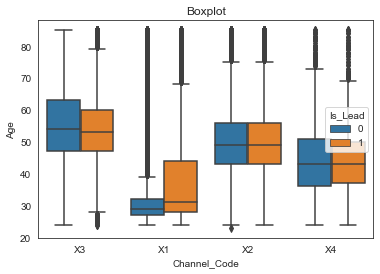

In [97]:
Grouped_Box_Plot(data,'Age', 'Channel_Code', 'Is_Lead')

We can notice here that 
* For Channel_Code - X1, mean age of Leadcustomers are higher than non-leadcustomers.
- for X2, x3, X4 mean age have no change

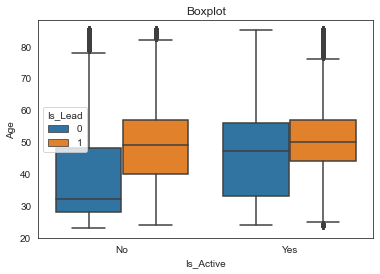

In [98]:
Grouped_Box_Plot(data,'Age', 'Is_Active', 'Is_Lead')

We can notice here that 
* For Is_Active - mean age of Leadcustomers are higher than non-leadcustomers

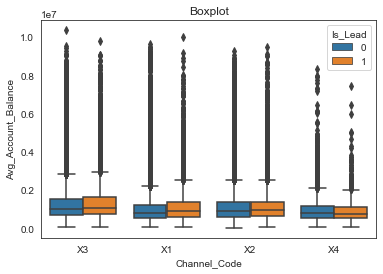

In [99]:
Grouped_Box_Plot(data,'Avg_Account_Balance', 'Channel_Code', 'Is_Lead')

--------------

In [100]:
### Outlier Analysis

In [101]:
AccBaloutlier

ID  Gender  Age Region_Code     Occupation Channel_Code  \
262     HJFEIUAE  Female  62   RG254       Other          X2            
265     SD5KZ8PG  Female  53   RG283       Self_Employed  X3            
277     YEJ3FOPT  Male    42   RG268       Salaried       X3            
386     H68HREE6  Female  49   RG284       Self_Employed  X2            
454     8CU34OKF  Male    63   RG268       Salaried       X3            
475     HDVOHVA3  Male    79   RG254       Other          X2            
536     W7COBDCR  Male    38   RG268       Self_Employed  X2            
540     N7EVFJXE  Female  64   RG261       Other          X2            
774     DJJQS7UC  Female  36   RG254       Self_Employed  X2            
812     XQDX7ZKM  Male    76   RG283       Other          X2            
1009    NFUQ8MMU  Male    43   RG268       Salaried       X3            
1087    FHMAVBAG  Male    45   RG268       Self_Employed  X3            
1167    J6KMK8NH  Female  60   RG268       Other          X3            
1289    VTCX8R2V  Male    40   RG268       Self_Employed  X3            
1291    QMDMGRKF  Male    52   RG284       Other          X3            
1491    MV5DC2CS  Female  49   RG283       Self_Employed  X3            
1613    KQN93LIY  Female  54   RG283       Salaried       X3            
1615    G5ZLRF8Q  Female  67   RG284       Other          X3            
1651    WZSZEATZ  Female  50   RG269       Self_Employed  X3            
1737    Y7XK2UDM  Female  48   RG283       Entrepreneur   X2            
1755    2CFHJQV7  Female  51   RG283       Entrepreneur   X3            
1827    553PF9ZU  Female  29   RG254       Salaried       X3            
1844    FB4WCFHY  Male    53   RG283       Self_Employed  X2            
1989    SRIDVMPS  Male    60   RG283       Self_Employed  X3            
2047    L2DYNKRP  Female  66   RG268       Other          X1            
2072    BI42K2XC  Female  52   RG283       Self_Employed  X2            
2514    TNEK469D  Female  59   RG268       Other          X3            
2574    MXAZ8E2P  Female  51   RG269       Self_Employed  X3            
2580    UWPXID2P  Male    29   RG268       Salaried       X1            
2642    CQ6NJXT4  Female  57   RG254       Self_Employed  X3            
2647    4ZCNYRKZ  Male    45   RG283       Self_Employed  X3            
2701    7SAYXZQY  Female  65   RG268       Other          X1            
2704    W6NIXZFH  Male    39   RG251       Self_Employed  X3            
2864    TWN23ZUH  Male    67   RG284       Other          X3            
2949    BY9VCG8X  Female  29   RG283       Self_Employed  X1            
2992    PPAQWPKC  Female  37   RG283       Salaried       X2            
3021    4QR63E5B  Female  56   RG268       Other          X3            
3212    FHHJHYMD  Male    77   RG268       Other          X3            
3222    EDXYMBXC  Male    74   RG284       Other          X3            
3289    YD9MSQJM  Female  42   RG268       Salaried       X3            
3356    BDSMM4K4  Male    71   RG268       Other          X3            
3360    I5F5YVVT  Male    52   RG283       Self_Employed  X3            
3435    DMPGNVG6  Male    44   RG254       Self_Employed  X3            
3441    RQ6JEGTS  Female  43   RG268       Self_Employed  X2            
3537    HAPST6TW  Male    51   RG281       Self_Employed  X2            
3680    VFH7BX35  Male    66   RG276       Other          X2            
3801    SBDNWVZC  Male    36   RG268       Self_Employed  X2            
3852    4YYOEJPK  Male    62   RG283       Other          X2            
3858    DHUD4QBD  Male    33   RG269       Salaried       X2            
3914    SYCUAMNZ  Male    84   RG254       Other          X2            
3932    KBSNQPXW  Female  29   RG261       Salaried       X1            
4068    9TBHJPVL  Female  32   RG283       Salaried       X1            
4082    W8ODW2Q9  Male    30   RG283       Other          X1            
4090    EMSYSCUT  Male    60   RG268       Other          X3            

-----

# AutoViz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
avreport = AV.AutoViz('train_s3TEQDk_IyaGz9Y_nvfXhoC.csv', depVar='Is_Lead')

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (245725, 11)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  

# Summary EDA

### Summary : UVA 

The Train dataset is an imbalanced dataset where above 75% are Zero value

- Summary of Age
 - Mean age = 43.85
 - Median age = 43
 - most customers are in between 23 and 85
 - skewness = +0.62 positively skewed
 - Kurtosis =-0.44, less exreme value presence
 

- Summary of Vintage
 - Mean Vintage = 46.95 months
 - Median Vintage = 32 months
 - most customers are in between 7 and 135 months
 - skewness = +0.79 positively skewed
 - Kurtosis =-0.7, less exreme value presence
 

- Summary of Avg_Account_Balance
 - Mean Avg_Account_Balance = 11.28 lakhs
  - Median Avg_Account_Balance = 8.94 lakhs
  - most customers are in between 20k and 10 Million
  - skewness = +0.2.97 very positively skewed
  - Kurtosis = +14.3, exreme value presence


- Summary of Gender
 - Approximately 45% of customers are Females and 55% customers are Males
- Summary of Region_Code
 - Only a few have significant presence, might result in sparse matrix, better create new column "Region_Code_others" for non significant Region_Codes

- Summary of Occupation
 - nearly half are self employed followed by salaried and others
 - Entrepreneurs are only 1% of customers

- Summary of Channel_Code
 - Through X1, 42.20% of customers are acquired
 - Through X3, 27.96%o of customers are acquired
 - Through X2, 27.56% of customers are acquired
 - Through X4, 02.26% of customers are acquired

- Summary of Credit_Product
 - Approximately 33 % of customers had Credit_Products and 66% dont

- Summary of Is_Active
 - Approximately 38 % of customers is Active in last 3 Months and 61% not active


- We observed that 29325 values are missing from Credit_Product column.
 - We observed that out of 29325 missing values, 24975 are interested on creditcard



### Summary : BVA

- As Age increases, Vintage also increases. 
It has a very high correlation with Vintage of 0.63 Pearson correlation score
- As Vintage increases, Avg_Account_Balance also increases
- As Age increases, Avg_Account_Balance also increases till approx 70 years, then decreases

- with increase in Age, people are more interested in creditcard
- with increase in Vintage, people are more interested in creditcard
- with increase in Avg_Account_Balance, people are more interested in creditcard


- Gender has significant effect on the interest for creditcard.
 - Male shows more interest

- Occupation has significant effect on the interest for creditcard.
 - Entrepreneur shows more interest, followed by self_employed. 
 - salaried shows least interest, the hypothesis was wrong

- Channel_Code has significant effect on the interest for creditcard.
 - X3 shows more interest, followed by X2. 
 - X1 shows least interest

- Credit_Product has significant effect on the interest for creditcard.
 - Credit_Product =1 shows more interest

- Is_Active has significant effect on the interest for creditcard.
 - Is_Active =1 shows more interest

- Age group has significant effect on the interest for creditcard.
 - Fiftys, fourtys, Senior citizens and Very old are more interested meanwhile  young and thirtys are the least.

- Vintage group has significant effect on the interest for creditcard.
 - Customers of Vintage 80-140 months are more interested meanwhile less than 20 and 20-60 are the least interested.

- Credit_Product relation with other variables

* Credit_Products have significant relation with Is_Lead
 - when Credit_Product= Yes, chance for Is_Lead is very high

* Credit_Product have significant relation with Gender. for males are more interested
* Credit_Product have relation with Occupation. almost all Entreprenuers are interested. followed by other and self employed
* Credit_Product have relation with Channel_Code and most significant with X4, X3, X2
* Credit_Product have relation with Is_Active and inactive customers are  more interested than active ones


- Missing values have significant correlation with Occupation

### Multivariate Analysis

- Entrepreneurs who are interested on credit product are definitely interested for creditcards irrespctive of gender
- irrespective of gender, salaried from 40-80 age are looking for creditcard
- irrespective of gender, Entrepreneurs from 20-60 age are looking for creditcard
- Entrepreneurs of age range 20-60, Others of age 40-60 and salaried of age 60-80 shows more creditcard interest

- For occupation - other, salaried and self employed- mean age of Leadcustomers are higher than non-leadcustomers.
 - for entrepreneur mean age have no chnage

- For Channel_Code - X1, mean age of Leadcustomers are higher than non-leadcustomers.
 - for X2, x3, X4 mean age have no change

- For Is_Active - mean age of Leadcustomers are higher than non-leadcustomers



In [5]:
train= trainorg.copy()
test = testorg.copy()

------------

# Step 4: Prepare submission file and remove unwanted columns

In [6]:
# Prepare submission file

submission = pd.DataFrame() # Create a submission dataframe
submission['ID'] = test['ID'] # Copy CustomerID column values from test dataset to submission dataframe

In [7]:
# Drop unwanted columns
train.drop(['ID'],axis=1,inplace=True) # Delete ID from training dataset 
test.drop(['ID'],axis=1,inplace=True) # Delete ID from test dataset 

train.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

------------

# Step 5: 

### Data Cleaning
### 1. Missing values


In [8]:
## Replacing with a new category

In [9]:
train['Credit_Product'] =train['Credit_Product'].replace(np.nan, "missing")
print ("\nMissing values :  ", train.isna().sum().values.sum())

test['Credit_Product'] = test['Credit_Product'].replace(np.nan, "missing")
print ("\nMissing values :  ", test.isna().sum().values.sum())


Missing values :   0

Missing values :   0


In [10]:
train.Credit_Product.unique()

array(['No', 'missing', 'Yes'], dtype=object)

In [11]:
test.Credit_Product.unique()

array(['Yes', 'missing', 'No'], dtype=object)

### 2. Outlier Treatment

### 5.2.1 Variable Transformation
#### Applying Log transform

<AxesSubplot:>

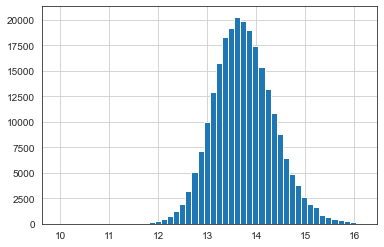

In [12]:
np.log(train['Avg_Account_Balance']).hist(bins= 50)

In [13]:
np.log(train['Avg_Account_Balance']).skew()

0.2351775282236966

In [14]:
train['Avg_Account_Balance']= np.log(train['Avg_Account_Balance'])

---------

# Step 6: Feature Engineering

### 1. Binning

### Binning Using Decision Tree Split

In [15]:
# Age Bin

Agebins=[23,32,35,41,85]
labels =["minor","young","elder","old"]

train['Age_category']=pd.cut(train["Age"], bins= Agebins, labels= labels)
test['Age_category']=pd.cut(test["Age"], bins= Agebins, labels= labels)


In [16]:
# Vintage Bin

Vintagebins=[7,39,65,77,135]
labels =["minor","young","elder","old"]

train['Vintage_category']=pd.cut(train["Vintage"], bins= Vintagebins, labels= labels)
test['Vintage_category']=pd.cut(test["Vintage"], bins= Vintagebins, labels= labels)

In [17]:
# AvgBal Bin

Avg_Account_Balancebins=[0,554830,873148,1481543,10352010]
labels =["minor","young","elder","old"]

train['Avg_Account_Balance_category']=pd.cut(train["Avg_Account_Balance"], bins= Avg_Account_Balancebins, labels= labels)
test['Avg_Account_Balance_category']=pd.cut(test["Avg_Account_Balance"], bins= Avg_Account_Balancebins, labels= labels)

### 2.  Indicator variable `Credit_Product_NaN` for missing values

In [18]:
train["Credit_Product_NA"]=  train["Credit_Product"].isna()*1
test["Credit_Product_NA"]=  test["Credit_Product"].isna()*1

### 3.  Frequency Encoding

In [19]:
train.nunique()

Gender                               2
Age                                 63
Region_Code                         35
Occupation                           4
Channel_Code                         4
Vintage                             66
Credit_Product                       3
Avg_Account_Balance             135292
Is_Active                            2
Is_Lead                              2
Age_category                         4
Vintage_category                     4
Avg_Account_Balance_category         1
Credit_Product_NA                    1
dtype: int64

In [20]:
temp = train['Region_Code'].value_counts()
temptest= test['Region_Code'].value_counts()

In [21]:
train['Region_Code_count'] = train['Region_Code'].apply(lambda x: temp[x])
test['Region_Code_count'] = test['Region_Code'].apply(lambda x: temptest[x])

train[['Region_Code','Region_Code_count']].head()

Region_Code  Region_Code_count
0       RG268              35934
1       RG277              12826
2       RG268              35934
3       RG270               7720
4       RG282               5829

### 4. Feature Interaction

### Feature 1 - Vintage and Age  Ratio


In [22]:
train['Vinate_Age_ratio'] = train['Vintage'] / train['Age']
test['Vinate_Age_ratio'] = test['Vintage'] / test['Age']

train[['Age', 'Vintage', 'Vinate_Age_ratio']].head()

Age  Vintage  Vinate_Age_ratio
0   73       43          0.589041
1   30       32          1.066667
2   56       26          0.464286
3   34       19          0.558824
4   30       33          1.100000

# Step 7: 

## Segregate train and test


In [23]:
### Lets combine training and test dataset

#Combine train and test datasets
combine_set=pd.concat([train,test], ignore_index=True)
combine_set.shape

(351037, 16)

In [24]:
### Segregating train and test

In [25]:
train_df=combine_set[combine_set['Is_Lead'].isna()==False]
test_df=combine_set[combine_set['Is_Lead'].isna()==True]

In [26]:
#Drop target variable from X and copy to y
X=train_df.drop(['Is_Lead'],axis=1)
y=train_df['Is_Lead']
X.shape, y.shape

((245725, 15), (245725,))

In [27]:
#Drop target column (which is blank) from test dataset
X_main_test=test_df.drop(['Is_Lead'],axis=1)

## Segregate train and Valid-test set


In [28]:
#Splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101, stratify=y)

---------

# Step 8: Pre-processing

### 8.1 Feature transformation {Log Transform}

In [29]:
X_train['Age'] = np.log(X_train['Age'])
X_test['Age'] = np.log(X_test['Age'])

X_train['Vintage'] = np.log(X_train['Vintage'])
X_test['Vintage'] = np.log(X_test['Vintage'])

X_main_test['Age'] = np.log(X_main_test['Age'])
X_main_test['Vintage'] = np.log(X_main_test['Vintage'])

### 8.2 Feature Scaling (Using MinMax Scaler)

In [30]:
### Seperating categorical and numerical features

num_feat = [ 'Age',  'Vintage', 'Avg_Account_Balance', 'Region_Code_count', 'Vinate_Age_ratio']
ohe_feat = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code','Credit_Product', 'Is_Active','Age_category','Vintage_category', 'Avg_Account_Balance_category', 'Credit_Product_NA']

In [31]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for col in num_feat:
    X_train[col]= scaler.fit_transform(X_train[col].values.reshape(-1,1))
    X_test[col]= scaler.transform(X_test[col].values.reshape(-1,1))
    X_main_test[col] = scaler.transform(X_main_test[col].values.reshape(-1,1))

### 8.3 Feature Encoding

In [32]:
#Label Encoding using Map Function

In [33]:
Age_category = {'minor':0, 'young':1, 'elder':2 ,'old':3}
X_train["Age_category"] = X_train["Age_category"].map(Age_category)
X_test["Age_category"] = X_test["Age_category"].map(Age_category)
X_main_test["Age_category"] = X_main_test["Age_category"].map(Age_category)

Vintage_category = {'minor':0, 'young':1, 'elder':2 ,'old':3}
X_train["Vintage_category"] = X_train["Vintage_category"].map(Vintage_category)
X_test["Vintage_category"] = X_test["Vintage_category"].map(Vintage_category)
X_main_test["Vintage_category"] = X_main_test["Vintage_category"].map(Vintage_category)


Avg_Account_Balance_category = {'minor':0, 'young':1, 'elder':2 ,'old':3}
X_train["Avg_Account_Balance_category"] = X_train["Avg_Account_Balance_category"].map(Avg_Account_Balance_category)
X_test["Avg_Account_Balance_category"] = X_test["Avg_Account_Balance_category"].map(Avg_Account_Balance_category)
X_main_test["Avg_Account_Balance_category"] = X_main_test["Avg_Account_Balance_category"].map(Avg_Account_Balance_category)


In [34]:
#OneHot Encoding using pd.get_dummies function

In [35]:
X_train = pd.concat([X_train,pd.get_dummies(X_train['Gender'], prefix='Gender', drop_first=True)],axis=1).drop(['Gender'],axis=1)
X_train = pd.concat([X_train,pd.get_dummies(X_train['Region_Code'], prefix='Region_Code', drop_first=True)],axis=1).drop(['Region_Code'],axis=1)
X_train = pd.concat([X_train,pd.get_dummies(X_train['Occupation'], prefix='Occupation', drop_first=True)],axis=1).drop(['Occupation'],axis=1)
X_train = pd.concat([X_train,pd.get_dummies(X_train['Channel_Code'], prefix='Channel_Code', drop_first=True)],axis=1).drop(['Channel_Code'],axis=1)
X_train = pd.concat([X_train,pd.get_dummies(X_train['Credit_Product'], prefix='Credit_Product', drop_first=True)],axis=1).drop(['Credit_Product'],axis=1)
X_train = pd.concat([X_train,pd.get_dummies(X_train['Is_Active'], prefix='Is_Active', drop_first=True)],axis=1).drop(['Is_Active'],axis=1)
X_train = pd.concat([X_train,pd.get_dummies(X_train['Credit_Product_NA'], prefix='Credit_Product_NA', drop_first=True)],axis=1).drop(['Credit_Product_NA'],axis=1)
X_train = pd.concat([X_train,pd.get_dummies(X_train['Age_category'], prefix='Age_category', drop_first=True)],axis=1).drop(['Age_category'],axis=1)
X_train = pd.concat([X_train,pd.get_dummies(X_train['Vintage_category'], prefix='Vintage_category', drop_first=True)],axis=1).drop(['Vintage_category'],axis=1)
X_train = pd.concat([X_train,pd.get_dummies(X_train['Avg_Account_Balance_category'], prefix='Avg_Account_Balance_category', drop_first=True)],axis=1).drop(['Avg_Account_Balance_category'],axis=1)


X_test = pd.concat([X_test,pd.get_dummies(X_test['Gender'], prefix='Gender', drop_first=True)],axis=1).drop(['Gender'],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Region_Code'], prefix='Region_Code', drop_first=True)],axis=1).drop(['Region_Code'],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Occupation'], prefix='Occupation', drop_first=True)],axis=1).drop(['Occupation'],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Channel_Code'], prefix='Channel_Code', drop_first=True)],axis=1).drop(['Channel_Code'],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Credit_Product'], prefix='Credit_Product', drop_first=True)],axis=1).drop(['Credit_Product'],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Is_Active'], prefix='Is_Active', drop_first=True)],axis=1).drop(['Is_Active'],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Credit_Product_NA'], prefix='Credit_Product_NA', drop_first=True)],axis=1).drop(['Credit_Product_NA'],axis=1)

X_test = pd.concat([X_test,pd.get_dummies(X_test['Age_category'], prefix='Age_category', drop_first=True)],axis=1).drop(['Age_category'],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Vintage_category'], prefix='Vintage_category', drop_first=True)],axis=1).drop(['Vintage_category'],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Avg_Account_Balance_category'], prefix='Avg_Account_Balance_category', drop_first=True)],axis=1).drop(['Avg_Account_Balance_category'],axis=1)


In [36]:
X_main_test = pd.concat([X_main_test,pd.get_dummies(X_main_test['Gender'], prefix='Gender', drop_first=True)],axis=1).drop(['Gender'],axis=1)
X_main_test = pd.concat([X_main_test,pd.get_dummies(X_main_test['Region_Code'], prefix='Region_Code', drop_first=True)],axis=1).drop(['Region_Code'],axis=1)
X_main_test = pd.concat([X_main_test,pd.get_dummies(X_main_test['Occupation'], prefix='Occupation', drop_first=True)],axis=1).drop(['Occupation'],axis=1)
X_main_test = pd.concat([X_main_test,pd.get_dummies(X_main_test['Channel_Code'], prefix='Channel_Code', drop_first=True)],axis=1).drop(['Channel_Code'],axis=1)
X_main_test = pd.concat([X_main_test,pd.get_dummies(X_main_test['Credit_Product'], prefix='Credit_Product', drop_first=True)],axis=1).drop(['Credit_Product'],axis=1)
X_main_test = pd.concat([X_main_test,pd.get_dummies(X_main_test['Is_Active'], prefix='Is_Active', drop_first=True)],axis=1).drop(['Is_Active'],axis=1)
X_main_test = pd.concat([X_main_test,pd.get_dummies(X_main_test['Credit_Product_NA'], prefix='Credit_Product_NA', drop_first=True)],axis=1).drop(['Credit_Product_NA'],axis=1)

X_main_test = pd.concat([X_main_test,pd.get_dummies(X_main_test['Age_category'], prefix='Age_category', drop_first=True)],axis=1).drop(['Age_category'],axis=1)
X_main_test = pd.concat([X_main_test,pd.get_dummies(X_main_test['Vintage_category'], prefix='Vintage_category', drop_first=True)],axis=1).drop(['Vintage_category'],axis=1)
X_main_test = pd.concat([X_main_test,pd.get_dummies(X_main_test['Avg_Account_Balance_category'], prefix='Avg_Account_Balance_category', drop_first=True)],axis=1).drop(['Avg_Account_Balance_category'],axis=1)


-------

In [37]:
X_train.shape, y_train.shape

((196580, 58), (196580,))

-----------

## Step 9: Dimensionality reduction

### 1. Low_variance_filter

In [38]:
#storing the variance and name of variables
variance = X_train.var()
columns = X_train.columns

In [39]:
#saving the names of variables having variance more than a threshold value
variable = [ ]
for i in range(0,len(variance)):
    if variance[i]>=0.006:   #setting the threshold as 0.006
        variable.append(columns[i])

In [40]:
# creating a new dataframe using the above variables
X_trainLVdf = X_train[variable]
X_testLVdf = X_test[variable]

In [41]:
# first five rows of the new data
X_trainLVdf.head()

Age   Vintage  Avg_Account_Balance  Region_Code_count  \
213730  0.840459  0.796845             0.694575           1.000000   
71772   0.122665  0.337413             0.474775           0.327497   
17981   0.252641  0.502837             0.525758           0.080988   
53333   0.460676  0.763266             0.663333           1.000000   
105588  0.252641  0.430148             0.654981           0.328978   

        Vinate_Age_ratio  Gender_Male  Region_Code_RG251  Region_Code_RG252  \
213730          0.328372            0                  0                  0   
71772           0.206072            1                  0                  0   
17981           0.293975            0                  0                  1   
53333           0.501751            0                  0                  0   
105588          0.231791            1                  0                  0   

        Region_Code_RG253  Region_Code_RG254  ...  Channel_Code_X4  \
213730                  0                  0  ...                0   
71772                   0                  0  ...                0   
17981                   0                  0  ...                0   
53333                   0                  0  ...                0   
105588                  0                  0  ...                0   

        Credit_Product_Yes  Credit_Product_missing  Is_Active_Yes  \
213730                   1                       0              0   
71772                    0                       0              1   
17981                    0                       0              0   
53333                    0                       1              1   
105588                   0                       0              0   

        Age_category_1  Age_category_2  Age_category_3  Vintage_category_1  \
213730               0               0               1                   0   
71772                0               0               0                   0   
17981                0               0               0                   0   
53333                0               0               1                   0   
105588               0               0               0                   0   

        Vintage_category_2  Vintage_category_3  
213730                   1                   0  
71772                    0                   0  
17981                    0                   0  
53333                    1                   0  
105588                   0                   0  

[5 rows x 55 columns]

In [42]:
# shape of new and original data
X_trainLVdf.shape, X_train.shape

((196580, 55), (196580, 58))

### 2. High_Correlation_Filter

In [43]:
# calculalting the correlation between independent variables
X_trainLVdf.corr()

Age   Vintage  Avg_Account_Balance  \
Age                       1.000000  0.660284             0.175561   
Vintage                   0.660284  1.000000             0.196253   
Avg_Account_Balance       0.175561  0.196253             1.000000   
Region_Code_count         0.248811  0.245309             0.383070   
Vinate_Age_ratio          0.327355  0.891963             0.160577   
Gender_Male               0.164384  0.140173             0.031206   
Region_Code_RG251         0.001274 -0.027588            -0.105831   
Region_Code_RG252        -0.078604 -0.055357            -0.110680   
Region_Code_RG253         0.017749  0.005966             0.030501   
Region_Code_RG254        -0.006833  0.003146             0.144832   
Region_Code_RG255        -0.009819 -0.009681            -0.023634   
Region_Code_RG256        -0.061248 -0.047149            -0.077419   
Region_Code_RG257        -0.052188 -0.040653            -0.063500   
Region_Code_RG258        -0.017793 -0.023016            -0.058144   
Region_Code_RG259        -0.037188 -0.025828            -0.084379   
Region_Code_RG260        -0.029043 -0.019003            -0.064661   
Region_Code_RG261        -0.076155 -0.066366            -0.020200   
Region_Code_RG262        -0.018542 -0.013357             0.012125   
Region_Code_RG263        -0.016795 -0.033648            -0.044386   
Region_Code_RG264        -0.050150 -0.043970            -0.074159   
Region_Code_RG265         0.014883 -0.001282            -0.032390   
Region_Code_RG266        -0.040678 -0.024501            -0.055621   
Region_Code_RG267        -0.038609 -0.028129            -0.054450   
Region_Code_RG268         0.153903  0.152292             0.187198   
Region_Code_RG269        -0.025478 -0.025637            -0.017752   
Region_Code_RG270        -0.089532 -0.100617            -0.114573   
Region_Code_RG271        -0.044402 -0.034574            -0.042496   
Region_Code_RG272        -0.004271 -0.020060            -0.038826   
Region_Code_RG273        -0.010933 -0.022915            -0.049849   
Region_Code_RG274        -0.067767 -0.054385            -0.008917   
Region_Code_RG275        -0.045510 -0.034906            -0.034502   
Region_Code_RG276         0.016401  0.005609            -0.003359   
Region_Code_RG277        -0.031213 -0.028551            -0.043648   
Region_Code_RG278         0.008270  0.003778            -0.022834   
Region_Code_RG279        -0.026491 -0.027526            -0.083115   
Region_Code_RG280        -0.012933 -0.037743            -0.120293   
Region_Code_RG281        -0.032499 -0.025654            -0.034352   
Region_Code_RG282        -0.033165 -0.021019            -0.022451   
Region_Code_RG283         0.137665  0.132793             0.172030   
Region_Code_RG284         0.106136  0.104998             0.133310   
Occupation_Other          0.335843  0.148954             0.068807   
Occupation_Salaried      -0.603692 -0.414689            -0.093186   
Occupation_Self_Employed  0.240490  0.231407             0.013568   
Channel_Code_X2           0.316260  0.196289             0.022223   
Channel_Code_X3           0.470565  0.501546             0.130893   
Channel_Code_X4           0.019939 -0.240034            -0.032613   
Credit_Product_Yes        0.142377  0.078263             0.064073   
Credit_Product_missing    0.209500  0.208813             0.056940   
Is_Active_Yes             0.235863  0.189763             0.089577   
Age_category_1           -0.143356 -0.137357            -0.050137   
Age_category_2           -0.068180 -0.100842            -0.036815   
Age_category_3            0.877131  0.648691             0.162078   
Vintage_category_1        0.256940  0.201784             0.052883   
Vintage_category_2        0.191239  0.241755             0.041892   
Vintage_category_3        0.492271  0.746115             0.159913   

                          Region_Code_count  Vinate_Age_ratio  Gender_Male  \
Age                                0.248811          0.327355     0.164384   
Vintage   

In [44]:
# creating correlation matrix
corr_matrix = X_trainLVdf.corr().abs()

In [45]:
# selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

Age   Vintage  Avg_Account_Balance  \
Age                       NaN  0.660284             0.175561   
Vintage                   NaN       NaN             0.196253   
Avg_Account_Balance       NaN       NaN                  NaN   
Region_Code_count         NaN       NaN                  NaN   
Vinate_Age_ratio          NaN       NaN                  NaN   
Gender_Male               NaN       NaN                  NaN   
Region_Code_RG251         NaN       NaN                  NaN   
Region_Code_RG252         NaN       NaN                  NaN   
Region_Code_RG253         NaN       NaN                  NaN   
Region_Code_RG254         NaN       NaN                  NaN   
Region_Code_RG255         NaN       NaN                  NaN   
Region_Code_RG256         NaN       NaN                  NaN   
Region_Code_RG257         NaN       NaN                  NaN   
Region_Code_RG258         NaN       NaN                  NaN   
Region_Code_RG259         NaN       NaN                  NaN   
Region_Code_RG260         NaN       NaN                  NaN   
Region_Code_RG261         NaN       NaN                  NaN   
Region_Code_RG262         NaN       NaN                  NaN   
Region_Code_RG263         NaN       NaN                  NaN   
Region_Code_RG264         NaN       NaN                  NaN   
Region_Code_RG265         NaN       NaN                  NaN   
Region_Code_RG266         NaN       NaN                  NaN   
Region_Code_RG267         NaN       NaN                  NaN   
Region_Code_RG268         NaN       NaN                  NaN   
Region_Code_RG269         NaN       NaN                  NaN   
Region_Code_RG270         NaN       NaN                  NaN   
Region_Code_RG271         NaN       NaN                  NaN   
Region_Code_RG272         NaN       NaN                  NaN   
Region_Code_RG273         NaN       NaN                  NaN   
Region_Code_RG274         NaN       NaN                  NaN   
Region_Code_RG275         NaN       NaN                  NaN   
Region_Code_RG276         NaN       NaN                  NaN   
Region_Code_RG277         NaN       NaN                  NaN   
Region_Code_RG278         NaN       NaN                  NaN   
Region_Code_RG279         NaN       NaN                  NaN   
Region_Code_RG280         NaN       NaN                  NaN   
Region_Code_RG281         NaN       NaN                  NaN   
Region_Code_RG282         NaN       NaN                  NaN   
Region_Code_RG283         NaN       NaN                  NaN   
Region_Code_RG284         NaN       NaN                  NaN   
Occupation_Other          NaN       NaN                  NaN   
Occupation_Salaried       NaN       NaN                  NaN   
Occupation_Self_Employed  NaN       NaN                  NaN   
Channel_Code_X2           NaN       NaN                  NaN   
Channel_Code_X3           NaN       NaN                  NaN   
Channel_Code_X4           NaN       NaN                  NaN   
Credit_Product_Yes        NaN       NaN                  NaN   
Credit_Product_missing    NaN       NaN                  NaN   
Is_Active_Yes             NaN       NaN                  NaN   
Age_category_1            NaN       NaN                  NaN   
Age_category_2            NaN       NaN                  NaN   
Age_category_3            NaN       NaN                  NaN   
Vintage_category_1        NaN       NaN                  NaN   
Vintage_category_2        NaN       NaN                  NaN   
Vintage_category_3        NaN       NaN                  NaN   

                          Region_Code_count  Vinate_Age_ratio  Gender_Male  \
Age                                0.248811          0.327355     0.164384   
Vintage                            0.245309          0.891963     0.140173   
Avg_Account_Balance                0.383070          0.160577     0.031206   
Region_Code_count                       NaN          0.198806     0.026389   
Vinate_Age_ratio                        NaN        

In [46]:
# finding index of variables with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop

['Vintage',
 'Vinate_Age_ratio',
 'Region_Code_RG268',
 'Occupation_Salaried',
 'Age_category_3',
 'Vintage_category_3']

In [47]:
X_trainLVdf[to_drop].corr()

Vintage  Vinate_Age_ratio  Region_Code_RG268  \
Vintage              1.000000          0.891963           0.152292   
Vinate_Age_ratio     0.891963          1.000000           0.123619   
Region_Code_RG268    0.152292          0.123619           1.000000   
Occupation_Salaried -0.414689         -0.243621          -0.112942   
Age_category_3       0.648691          0.402488           0.149884   
Vintage_category_3   0.746115          0.771450           0.122083   

                     Occupation_Salaried  Age_category_3  Vintage_category_3  
Vintage                        -0.414689        0.648691            0.746115  
Vinate_Age_ratio               -0.243621        0.402488            0.771450  
Region_Code_RG268              -0.112942        0.149884            0.122083  
Occupation_Salaried             1.000000       -0.596981           -0.291466  
Age_category_3                 -0.596981        1.000000            0.493804  
Vintage_category_3             -0.291466        0.493804            1.000000

In [48]:
# dropping the variable and creating new dataset
X_trainhighcorrfilter = X_trainLVdf.drop(X_trainLVdf[to_drop], axis=1)
X_testhighcorrfilter = X_testLVdf.drop(X_testLVdf[to_drop], axis=1)

In [49]:
# first five rows of the new data
X_trainhighcorrfilter.head()

Age  Avg_Account_Balance  Region_Code_count  Gender_Male  \
213730  0.840459             0.694575           1.000000            0   
71772   0.122665             0.474775           0.327497            1   
17981   0.252641             0.525758           0.080988            0   
53333   0.460676             0.663333           1.000000            0   
105588  0.252641             0.654981           0.328978            1   

        Region_Code_RG251  Region_Code_RG252  Region_Code_RG253  \
213730                  0                  0                  0   
71772                   0                  0                  0   
17981                   0                  1                  0   
53333                   0                  0                  0   
105588                  0                  0                  0   

        Region_Code_RG254  Region_Code_RG255  Region_Code_RG256  ...  \
213730                  0                  0                  0  ...   
71772                   0                  0                  0  ...   
17981                   0                  0                  0  ...   
53333                   0                  0                  0  ...   
105588                  0                  0                  0  ...   

        Channel_Code_X2  Channel_Code_X3  Channel_Code_X4  Credit_Product_Yes  \
213730                1                0                0                   1   
71772                 0                0                0                   0   
17981                 0                0                0                   0   
53333                 0                0                0                   0   
105588                0                0                0                   0   

        Credit_Product_missing  Is_Active_Yes  Age_category_1  Age_category_2  \
213730                       0              0               0               0   
71772                        0              1               0               0   
17981                        0              0               0               0   
53333                        1              1               0               0   
105588                       0              0               0               0   

        Vintage_category_1  Vintage_category_2  
213730                   0                   1  
71772                    0                   0  
17981                    0                   0  
53333                    0                   1  
105588                   0                   0  

[5 rows x 49 columns]

In [50]:
# shape of new and original data
X_trainhighcorrfilter.shape, X_train.shape

((196580, 49), (196580, 58))

-------

### Feature selection  using 

### 1.1 SelectKBest and F_Classif.

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction
skb = SelectKBest(score_func=f_classif,  k=10)
skb.fit_transform(X_train, y_train)


array([[0.8404593 , 0.79684501, 0.32837231, ..., 0.        , 1.        ,
        0.        ],
       [0.12266518, 0.33741325, 0.20607227, ..., 0.        , 0.        ,
        0.        ],
       [0.25264117, 0.50283667, 0.29397542, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.59405929, 0.52396295, 0.19157785, ..., 0.        , 1.        ,
        0.        ],
       [0.15048712, 0.25753503, 0.15035823, ..., 0.        , 0.        ,
        0.        ],
       [0.70760342, 0.86672299, 0.49303814, ..., 0.        , 1.        ,
        1.        ]])

In [52]:
X_train.columns[skb.get_support()] # Top 10 SelectKBest features

Index(['Age', 'Vintage', 'Vinate_Age_ratio', 'Occupation_Salaried',
       'Channel_Code_X2', 'Channel_Code_X3', 'Credit_Product_Yes',
       'Credit_Product_missing', 'Age_category_3', 'Vintage_category_3'],
      dtype='object')

In [53]:
# Get columns to keep and create new dataframe with those only
cols = skb.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
features_df_new

Age   Vintage  Vinate_Age_ratio  Occupation_Salaried  \
213730  0.840459  0.796845          0.328372                    0   
71772   0.122665  0.337413          0.206072                    0   
17981   0.252641  0.502837          0.293975                    0   
53333   0.460676  0.763266          0.501751                    0   
105588  0.252641  0.430148          0.231791                    1   
...          ...       ...               ...                  ...   
73422   0.093793  0.234222          0.151269                    0   
181361  0.513456  0.430148          0.156939                    0   
119885  0.594059  0.523963          0.191578                    0   
34028   0.150487  0.257535          0.150358                    0   
126477  0.707603  0.866723          0.493038                    0   

        Channel_Code_X2  Channel_Code_X3  Credit_Product_Yes  \
213730                1                0                   1   
71772                 0                0                   0   
17981                 0                0                   0   
53333                 0                0                   0   
105588                0                0                   0   
...                 ...              ...                 ...   
73422                 0                0                   0   
181361                0                0                   1   
119885                1                0                   1   
34028                 0                0                   0   
126477                0                1                   0   

        Credit_Product_missing  Age_category_3  Vintage_category_3  
213730                       0               1                   0  
71772                        0               0                   0  
17981                        0               0                   0  
53333                        1               1                   0  
105588                       0               0                   0  
...                        ...             ...                 ...  
73422                        0               0                   0  
181361                       0               1                   0  
119885                       0               1                   0  
34028                        0               0                   0  
126477                       0               1                   1  

[196580 rows x 10 columns]

In [54]:
feature_ranking = pd.DataFrame(skb.scores_, index=X_train.columns, columns=['SelectKBest_f_classif'])
feature_ranking.sort_values(by='SelectKBest_f_classif', ascending=False)

SelectKBest_f_classif
Credit_Product_missing                   77583.531601
Vintage_category_3                       16381.359962
Age_category_3                           15157.050575
Vintage                                  14187.385729
Age                                      13568.889562
Vinate_Age_ratio                         11097.707763
Channel_Code_X3                           7310.555277
Channel_Code_X2                           3475.382883
Occupation_Salaried                       2762.381260
Credit_Product_Yes                        2720.095552
Region_Code_count                         1664.526906
Is_Active_Yes                             1424.630267
Occupation_Self_Employed                  1136.031112
Vintage_category_2                        1103.429552
Avg_Account_Balance                       1027.211934
Gender_Male                               1015.630186
Region_Code_RG268                          716.938164
Region_Code_RG283                          604.971991
Age_category_1                             405.814337
Region_Code_RG284                          381.166424
Region_Code_RG270                          293.502721
Region_Code_RG261                          173.070213
Region_Code_RG252                          168.158624
Region_Code_RG256                          132.458547
Region_Code_RG274                          129.907194
Vintage_category_1                         128.859953
Region_Code_RG264                          124.772521
Age_category_2                              87.986843
Region_Code_RG254                           79.573544
Region_Code_RG275                           71.469634
Region_Code_RG257                           61.873137
Region_Code_RG282                           59.933137
Region_Code_RG266                           55.881484
Region_Code_RG267                           48.811565
Region_Code_RG271                           35.798458
Region_Code_RG260                           27.302931
Occupation_Other                            26.163219
Region_Code_RG259                           25.287094
Region_Code_RG276                           19.606790
Region_Code_RG262                           18.189785
Region_Code_RG272                           10.678320
Region_Code_RG269                            9.367546
Region_Code_RG281                            9.276345
Channel_Code_X4                              6.119563
Region_Code_RG253                            3.829293
Region_Code_RG265                            3.606448
Region_Code_RG263                            2.347531
Region_Code_RG279                            2.221523
Region_Code_RG278                            1.649741
Region_Code_RG258                            1.263575
Region_Code_RG251                            0.739419
Region_Code_RG277                            0.218076
Region_Code_RG280                            0.079799
Region_Code_RG273                            0.029146
Region_Code_RG255                            0.015044
Avg_Account_Balance_category_1                    NaN
Avg_Account_Balance_category_2                    NaN
Avg_Account_Balance_category_3                    NaN

### 1.2 Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)


In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
skbchi = SelectKBest(score_func=chi2, k=10)
skbchi.fit_transform(X_train, y_train)

array([[0.8404593 , 0.79684501, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.12266518, 0.33741325, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25264117, 0.50283667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.59405929, 0.52396295, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.15048712, 0.25753503, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.70760342, 0.86672299, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [56]:
# summarize scores
np.set_printoptions(precision=2)
print(skbchi.scores_)

[1.83e+03 1.34e+03 1.66e+01 4.78e+02 1.02e+03 4.59e+02 7.22e-01 1.65e+02
 3.80e+00 7.09e+01 1.49e-02 1.31e+02 6.03e+01 1.25e+00 2.50e+01 2.70e+01
 1.68e+02 1.81e+01 2.31e+00 1.23e+02 3.58e+00 5.55e+01 4.85e+01 6.10e+02
 9.07e+00 2.84e+02 3.56e+01 1.04e+01 2.86e-02 1.27e+02 7.05e+01 1.94e+01
 2.07e-01 1.64e+00 2.19e+00 7.57e-02 9.09e+00 5.85e+01 5.31e+02 3.50e+02
 1.87e+01 1.93e+03 6.65e+02 2.48e+03 5.08e+03 5.98e+00 1.89e+03 4.90e+04
 8.65e+02 3.84e+02 8.05e+01 6.68e+03 1.13e+02 1.03e+03 1.17e+04      nan
      nan      nan]


In [57]:
# feature_ranking = pd.DataFrame(skbchi.scores_, index=X_train.columns, columns=['SKBCHI2'])
feature_ranking['SKBCHI2'] = skbchi.scores_
feature_ranking.sort_values(by='SKBCHI2', ascending=False)

SelectKBest_f_classif       SKBCHI2
Credit_Product_missing                   77583.531601  48993.998167
Vintage_category_3                       16381.359962  11656.446480
Age_category_3                           15157.050575   6679.666604
Channel_Code_X3                           7310.555277   5075.796553
Channel_Code_X2                           3475.382883   2475.410566
Occupation_Salaried                       2762.381260   1927.732126
Credit_Product_Yes                        2720.095552   1894.872427
Age                                      13568.889562   1825.222446
Vintage                                  14187.385729   1344.376847
Vintage_category_2                        1103.429552   1027.385511
Vinate_Age_ratio                         11097.707763   1020.593857
Is_Active_Yes                             1424.630267    865.221150
Occupation_Self_Employed                  1136.031112    664.918881
Region_Code_RG268                          716.938164    609.892741
Region_Code_RG283                          604.971991    530.813656
Region_Code_count                         1664.526906    477.813570
Gender_Male                               1015.630186    459.032355
Age_category_1                             405.814337    383.591984
Region_Code_RG284                          381.166424    350.414883
Region_Code_RG270                          293.502721    283.866712
Region_Code_RG261                          173.070213    167.588231
Region_Code_RG252                          168.158624    165.091831
Region_Code_RG256                          132.458547    130.830035
Region_Code_RG274                          129.907194    127.014674
Region_Code_RG264                          124.772521    123.283281
Vintage_category_1                         128.859953    113.008923
Age_category_2                              87.986843     80.456343
Region_Code_RG254                           79.573544     70.860415
Region_Code_RG275                           71.469634     70.502358
Region_Code_RG257                           61.873137     60.322886
Region_Code_RG282                           59.933137     58.484189
Region_Code_RG266                           55.881484     55.508660
Region_Code_RG267                           48.811565     48.500810
Region_Code_RG271                           35.798458     35.567259
Region_Code_RG260                           27.302931     26.955848
Region_Code_RG259                           25.287094     25.016184
Region_Code_RG276                           19.606790     19.381238
Occupation_Other                            26.163219     18.692732
Region_Code_RG262                           18.189785     18.056348
Avg_Account_Balance                       1027.211934     16.644000
Region_Code_RG272                           10.678320     10.447594
Region_Code_RG281                            9.276345      9.085744
Region_Code_RG269                            9.367546      9.068186
Channel_Code_X4                              6.119563      5.979632
Region_Code_RG253                            3.829293      3.800740
Region_Code_RG265                            3.606448      3.583779
Region_Code_RG263                            2.347531      2.312537
Region_Code_RG279                            2.221523      2.185674
Region_Code_RG278                            1.649741      1.637693
Region_Code_RG258                            1.263575      1.253558
Region_Code_RG251                            0.739419      0.721538
Region_Code_RG277                            0.218076      0.206664
Region_Code_RG280                            0.079799      0.075653
Region_Code_RG273                            0.029146      0.028617
Region_Code_RG255                            0.015044      0.014920
Avg_Account_Balance_category_1                    NaN           NaN
Avg_Account_Balance_category_2                    NaN           NaN
Avg_Account_Balance_category_3                    NaN           NaN

--------

In [58]:
feature_ranking['Total_Score'] = feature_ranking.apply(sum, axis=1)
featStatistical= feature_ranking.sort_values(by='Total_Score', ascending=False).T

In [59]:
finalstats= featStatistical.iloc[:,:15]
finalstats

Credit_Product_missing  Vintage_category_3  \
SelectKBest_f_classif            77583.531601        16381.359962   
SKBCHI2                          48993.998167        11656.446480   
Total_Score                     126577.529768        28037.806442   

                       Age_category_3       Vintage           Age  \
SelectKBest_f_classif    15157.050575  14187.385729  13568.889562   
SKBCHI2                   6679.666604   1344.376847   1825.222446   
Total_Score              21836.717179  15531.762576  15394.112008   

                       Channel_Code_X3  Vinate_Age_ratio  Channel_Code_X2  \
SelectKBest_f_classif      7310.555277      11097.707763      3475.382883   
SKBCHI2                    5075.796553       1020.593857      2475.410566   
Total_Score               12386.351830      12118.301620      5950.793450   

                       Occupation_Salaried  Credit_Product_Yes  Is_Active_Yes  \
SelectKBest_f_classif          2762.381260         2720.095552    1424.630267   
SKBCHI2                        1927.732126         1894.872427     865.221150   
Total_Score                    4690.113386         4614.967979    2289.851417   

                       Region_Code_count  Vintage_category_2  \
SelectKBest_f_classif        1664.526906         1103.429552   
SKBCHI2                       477.813570         1027.385511   
Total_Score                  2142.340476         2130.815063   

                       Occupation_Self_Employed  Gender_Male  
SelectKBest_f_classif               1136.031112  1015.630186  
SKBCHI2                              664.918881   459.032355  
Total_Score                         1800.949994  1474.662541

In [60]:
# finalfeatures data frame
statsdf= finalstats.columns
statsdf

Index(['Credit_Product_missing', 'Vintage_category_3', 'Age_category_3',
       'Vintage', 'Age', 'Channel_Code_X3', 'Vinate_Age_ratio',
       'Channel_Code_X2', 'Occupation_Salaried', 'Credit_Product_Yes',
       'Is_Active_Yes', 'Region_Code_count', 'Vintage_category_2',
       'Occupation_Self_Employed', 'Gender_Male'],
      dtype='object')

In [61]:
X_train_stats = X_train[statsdf]
X_test_stats = X_test[statsdf]

### 2.Recursive feature extraction

In [62]:
# Recursive feature extraction
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
LR = LogisticRegression(class_weight='balanced')

# feature extraction
rfe = RFE(estimator=LR, n_features_to_select=15)
rfe.fit_transform(X_train, y_train)

array([[0.84, 0.33, 1.  , ..., 1.  , 1.  , 0.  ],
       [0.12, 0.21, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.25, 0.29, 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.59, 0.19, 0.  , ..., 1.  , 0.  , 0.  ],
       [0.15, 0.15, 1.  , ..., 0.  , 0.  , 0.  ],
       [0.71, 0.49, 0.  , ..., 1.  , 0.  , 1.  ]])

In [63]:
feature_ranking['RFE_support'] = rfe.support_

In [64]:
feature_ranking

SelectKBest_f_classif       SKBCHI2  \
Age                                      13568.889562   1825.222446   
Vintage                                  14187.385729   1344.376847   
Avg_Account_Balance                       1027.211934     16.644000   
Region_Code_count                         1664.526906    477.813570   
Vinate_Age_ratio                         11097.707763   1020.593857   
Gender_Male                               1015.630186    459.032355   
Region_Code_RG251                            0.739419      0.721538   
Region_Code_RG252                          168.158624    165.091831   
Region_Code_RG253                            3.829293      3.800740   
Region_Code_RG254                           79.573544     70.860415   
Region_Code_RG255                            0.015044      0.014920   
Region_Code_RG256                          132.458547    130.830035   
Region_Code_RG257                           61.873137     60.322886   
Region_Code_RG258                            1.263575      1.253558   
Region_Code_RG259                           25.287094     25.016184   
Region_Code_RG260                           27.302931     26.955848   
Region_Code_RG261                          173.070213    167.588231   
Region_Code_RG262                           18.189785     18.056348   
Region_Code_RG263                            2.347531      2.312537   
Region_Code_RG264                          124.772521    123.283281   
Region_Code_RG265                            3.606448      3.583779   
Region_Code_RG266                           55.881484     55.508660   
Region_Code_RG267                           48.811565     48.500810   
Region_Code_RG268                          716.938164    609.892741   
Region_Code_RG269                            9.367546      9.068186   
Region_Code_RG270                          293.502721    283.866712   
Region_Code_RG271                           35.798458     35.567259   
Region_Code_RG272                           10.678320     10.447594   
Region_Code_RG273                            0.029146      0.028617   
Region_Code_RG274                          129.907194    127.014674   
Region_Code_RG275                           71.469634     70.502358   
Region_Code_RG276                           19.606790     19.381238   
Region_Code_RG277                            0.218076      0.206664   
Region_Code_RG278                            1.649741      1.637693   
Region_Code_RG279                            2.221523      2.185674   
Region_Code_RG280                            0.079799      0.075653   
Region_Code_RG281                            9.276345      9.085744   
Region_Code_RG282                           59.933137     58.484189   
Region_Code_RG283                          604.971991    530.813656   
Region_Code_RG284                          381.166424    350.414883   
Occupation_Other                            26.163219     18.692732   
Occupation_Salaried                       2762.381260   1927.732126   
Occupation_Self_Employed                  1136.031112    664.918881   
Channel_Code_X2                           3475.382883   2475.410566   
Channel_Code_X3                           7310.555277   5075.796553   
Channel_Code_X4                              6.119563      5.979632   
Credit_Product_Yes                        2720.095552   1894.872427   
Credit_Product_missing                   77583.531601  48993.998167   
Is_Active_Yes                             1424.630267    865.221150   
Age_category_1                             405.814337    383.591984   
Age_category_2                              87.986843     80.456343   
Age_category_3                           15157.050575   6679.666604   
Vintage_category_1                         128.859953    113.008923   
Vintage_category_2                        1103.429552   1027.385511   
Vintage_category_3                       16381.359962  11656.446480   
Avg_Account_Balance_category_1                    NaN   

In [65]:
X_train.columns[rfe.get_support()] #Top 15 RFE features

Index(['Age', 'Vinate_Age_ratio', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Credit_Product_Yes', 'Credit_Product_missing',
       'Age_category_1', 'Age_category_2', 'Age_category_3',
       'Vintage_category_2', 'Vintage_category_3'],
      dtype='object')

In [66]:
X_train.columns[(rfe.ranking_==1)]

Index(['Age', 'Vinate_Age_ratio', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Credit_Product_Yes', 'Credit_Product_missing',
       'Age_category_1', 'Age_category_2', 'Age_category_3',
       'Vintage_category_2', 'Vintage_category_3'],
      dtype='object')

In [67]:
feature_ranking['RFE'] = 100/rfe.ranking_
feature_ranking

SelectKBest_f_classif       SKBCHI2  \
Age                                      13568.889562   1825.222446   
Vintage                                  14187.385729   1344.376847   
Avg_Account_Balance                       1027.211934     16.644000   
Region_Code_count                         1664.526906    477.813570   
Vinate_Age_ratio                         11097.707763   1020.593857   
Gender_Male                               1015.630186    459.032355   
Region_Code_RG251                            0.739419      0.721538   
Region_Code_RG252                          168.158624    165.091831   
Region_Code_RG253                            3.829293      3.800740   
Region_Code_RG254                           79.573544     70.860415   
Region_Code_RG255                            0.015044      0.014920   
Region_Code_RG256                          132.458547    130.830035   
Region_Code_RG257                           61.873137     60.322886   
Region_Code_RG258                            1.263575      1.253558   
Region_Code_RG259                           25.287094     25.016184   
Region_Code_RG260                           27.302931     26.955848   
Region_Code_RG261                          173.070213    167.588231   
Region_Code_RG262                           18.189785     18.056348   
Region_Code_RG263                            2.347531      2.312537   
Region_Code_RG264                          124.772521    123.283281   
Region_Code_RG265                            3.606448      3.583779   
Region_Code_RG266                           55.881484     55.508660   
Region_Code_RG267                           48.811565     48.500810   
Region_Code_RG268                          716.938164    609.892741   
Region_Code_RG269                            9.367546      9.068186   
Region_Code_RG270                          293.502721    283.866712   
Region_Code_RG271                           35.798458     35.567259   
Region_Code_RG272                           10.678320     10.447594   
Region_Code_RG273                            0.029146      0.028617   
Region_Code_RG274                          129.907194    127.014674   
Region_Code_RG275                           71.469634     70.502358   
Region_Code_RG276                           19.606790     19.381238   
Region_Code_RG277                            0.218076      0.206664   
Region_Code_RG278                            1.649741      1.637693   
Region_Code_RG279                            2.221523      2.185674   
Region_Code_RG280                            0.079799      0.075653   
Region_Code_RG281                            9.276345      9.085744   
Region_Code_RG282                           59.933137     58.484189   
Region_Code_RG283                          604.971991    530.813656   
Region_Code_RG284                          381.166424    350.414883   
Occupation_Other                            26.163219     18.692732   
Occupation_Salaried                       2762.381260   1927.732126   
Occupation_Self_Employed                  1136.031112    664.918881   
Channel_Code_X2                           3475.382883   2475.410566   
Channel_Code_X3                           7310.555277   5075.796553   
Channel_Code_X4                              6.119563      5.979632   
Credit_Product_Yes                        2720.095552   1894.872427   
Credit_Product_missing                   77583.531601  48993.998167   
Is_Active_Yes                             1424.630267    865.221150   
Age_category_1                             405.814337    383.591984   
Age_category_2                              87.986843     80.456343   
Age_category_3                           15157.050575   6679.666604   
Vintage_category_1                         128.859953    113.008923   
Vintage_category_2                        1103.429552   1027.385511   
Vintage_category_3                       16381.359962  11656.446480   
Avg_Account_Balance_category_1                    NaN   

In [68]:
feature_ranking.sort_values(by='RFE', ascending=False).T

Age Vintage_category_3 Age_category_3  \
SelectKBest_f_classif  13568.889562       16381.359962   15157.050575   
SKBCHI2                 1825.222446        11656.44648    6679.666604   
Total_Score            15394.112008       28037.806442   21836.717179   
RFE_support                    True               True           True   
RFE                           100.0              100.0          100.0   

                      Age_category_2 Age_category_1 Credit_Product_missing  \
SelectKBest_f_classif      87.986843     405.814337           77583.531601   
SKBCHI2                    80.456343     383.591984           48993.998167   
Total_Score               168.443186      789.40632          126577.529768   
RFE_support                     True           True                   True   
RFE                            100.0          100.0                  100.0   

                      Credit_Product_Yes Channel_Code_X4 Channel_Code_X3  \
SelectKBest_f_classif        2720.095552        6.119563     7310.555277   
SKBCHI2                      1894.872427        5.979632     5075.796553   
Total_Score                  4614.967979       12.099195     12386.35183   
RFE_support                         True            True            True   
RFE                                100.0           100.0           100.0   

                      Channel_Code_X2  ... Region_Code_RG268  \
SelectKBest_f_classif     3475.382883  ...        716.938164   
SKBCHI2                   2475.410566  ...        609.892741   
Total_Score                5950.79345  ...       1326.830906   
RFE_support                      True  ...             False   
RFE                             100.0  ...          2.857143   

                      Region_Code_RG283  Gender_Male Region_Code_RG256  \
SelectKBest_f_classif        604.971991  1015.630186        132.458547   
SKBCHI2                      530.813656   459.032355        130.830035   
Total_Score                 1135.785647  1474.662541        263.288582   
RFE_support                       False        False             False   
RFE                            2.777778     2.702703          2.631579   

                      Avg_Account_Balance Region_Code_RG254 Region_Code_RG274  \
SelectKBest_f_classif         1027.211934         79.573544        129.907194   
SKBCHI2                            16.644         70.860415        127.014674   
Total_Score                   1043.855934        150.433959        256.921868   
RFE_support                         False             False             False   
RFE                              2.564103               2.5          2.439024   

                      Avg_Account_Balance_category_1  \
SelectKBest_f_classif                            NaN   
SKBCHI2                                          NaN   
Total_Score                                      NaN   
RFE_support                                    False   
RFE                                         2.380952   

                      Avg_Account_Balance_category_2  \
SelectKBest_f_classif                            NaN   
SKBCHI2                                          NaN   
Total_Score                                      NaN   
RFE_support                                    False   
RFE                                         2.325581   

                      Avg_Account_Balance_category_3  
SelectKBest_f_classif                            NaN  
SKBCHI2                                          NaN  
Total_Score                                      NaN  
RFE_support                                    False  
RFE                                         2.272727  

[5 rows x 58 columns]

In [69]:
finaltotal= feature_ranking.sort_values(by='Total_Score', ascending=False).T
finaltotal

Credit_Product_missing Vintage_category_3  \
SelectKBest_f_classif           77583.531601       16381.359962   
SKBCHI2                         48993.998167        11656.44648   
Total_Score                    126577.529768       28037.806442   
RFE_support                             True               True   
RFE                                    100.0              100.0   

                      Age_category_3       Vintage           Age  \
SelectKBest_f_classif   15157.050575  14187.385729  13568.889562   
SKBCHI2                  6679.666604   1344.376847   1825.222446   
Total_Score             21836.717179  15531.762576  15394.112008   
RFE_support                     True         False          True   
RFE                            100.0      9.090909         100.0   

                      Channel_Code_X3 Vinate_Age_ratio Channel_Code_X2  \
SelectKBest_f_classif     7310.555277     11097.707763     3475.382883   
SKBCHI2                   5075.796553      1020.593857     2475.410566   
Total_Score               12386.35183      12118.30162      5950.79345   
RFE_support                      True             True            True   
RFE                             100.0            100.0           100.0   

                      Occupation_Salaried Credit_Product_Yes  ...  \
SelectKBest_f_classif          2762.38126        2720.095552  ...   
SKBCHI2                       1927.732126        1894.872427  ...   
Total_Score                   4690.113386        4614.967979  ...   
RFE_support                          True               True  ...   
RFE                                 100.0              100.0  ...   

                      Region_Code_RG278 Region_Code_RG258 Region_Code_RG251  \
SelectKBest_f_classif          1.649741          1.263575          0.739419   
SKBCHI2                        1.637693          1.253558          0.721538   
Total_Score                    3.287435          2.517133          1.460957   
RFE_support                       False             False             False   
RFE                            3.333333          7.692308          5.882353   

                      Region_Code_RG277 Region_Code_RG280 Region_Code_RG273  \
SelectKBest_f_classif          0.218076          0.079799          0.029146   
SKBCHI2                        0.206664          0.075653          0.028617   
Total_Score                     0.42474          0.155452          0.057763   
RFE_support                       False             False             False   
RFE                                12.5          7.142857          6.666667   

                      Region_Code_RG255 Avg_Account_Balance_category_1  \
SelectKBest_f_classif          0.015044                            NaN   
SKBCHI2                         0.01492                            NaN   
Total_Score                    0.029964                            NaN   
RFE_support                       False                          False   
RFE                           11.111111                       2.380952   

                      Avg_Account_Balance_category_2  \
SelectKBest_f_classif                            NaN   
SKBCHI2                                          NaN   
Total_Score                                      NaN   
RFE_support                                    False   
RFE                                         2.325581   

                      Avg_Account_Balance_category_3  
SelectKBest_f_classif                            NaN  
SKBCHI2                                          NaN  
Total_Score                                      NaN  
RFE_support                                    False  
RFE                                         2.272727  

[5 rows x 58 columns]

In [70]:
finalrfe= finaltotal.iloc[:,:15]
finalrfe

Credit_Product_missing Vintage_category_3  \
SelectKBest_f_classif           77583.531601       16381.359962   
SKBCHI2                         48993.998167        11656.44648   
Total_Score                    126577.529768       28037.806442   
RFE_support                             True               True   
RFE                                    100.0              100.0   

                      Age_category_3       Vintage           Age  \
SelectKBest_f_classif   15157.050575  14187.385729  13568.889562   
SKBCHI2                  6679.666604   1344.376847   1825.222446   
Total_Score             21836.717179  15531.762576  15394.112008   
RFE_support                     True         False          True   
RFE                            100.0      9.090909         100.0   

                      Channel_Code_X3 Vinate_Age_ratio Channel_Code_X2  \
SelectKBest_f_classif     7310.555277     11097.707763     3475.382883   
SKBCHI2                   5075.796553      1020.593857     2475.410566   
Total_Score               12386.35183      12118.30162      5950.79345   
RFE_support                      True             True            True   
RFE                             100.0            100.0           100.0   

                      Occupation_Salaried Credit_Product_Yes Is_Active_Yes  \
SelectKBest_f_classif          2762.38126        2720.095552   1424.630267   
SKBCHI2                       1927.732126        1894.872427     865.22115   
Total_Score                   4690.113386        4614.967979   2289.851417   
RFE_support                          True               True         False   
RFE                                 100.0              100.0     33.333333   

                      Region_Code_count Vintage_category_2  \
SelectKBest_f_classif       1664.526906        1103.429552   
SKBCHI2                       477.81357        1027.385511   
Total_Score                 2142.340476        2130.815063   
RFE_support                       False               True   
RFE                            4.166667              100.0   

                      Occupation_Self_Employed  Gender_Male  
SelectKBest_f_classif              1136.031112  1015.630186  
SKBCHI2                             664.918881   459.032355  
Total_Score                        1800.949994  1474.662541  
RFE_support                               True        False  
RFE                                      100.0     2.702703

In [71]:
# finalfeatures data frame
rfedf= finalrfe.columns

In [72]:
X_train_rfe = X_train[rfedf]
X_test_rfe =  X_test[rfedf]

---------

In [76]:
#rfe features-  Final selection
X_train= X_train_rfe
X_test= X_test_rfe

# Step: 10 Model Building and Evaluation Metrics
Since this is a binary classification problem, AUC-ROC is the evaluation metric

The ROC AUC is the area under the curve when plotting the (normalized) true positive rate (x-axis) and the false positive rate (y-axis).

## Building a XGBM Model

In [77]:
#Importing XGBM Classifier 
from xgboost import XGBClassifier

In [78]:
#set parameters
xgb = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0.15,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=101)

In [79]:
#training the model
xgb.fit(X_train,y_train)

[02:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.15, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=101, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [80]:
pred_train= xgb.predict_proba(X_train)[:,1]
pred_test= xgb.predict_proba(X_test)[:,1]

In [81]:
roc_auc_score(y_train, pred_train)

0.8775737873736882

In [82]:
roc_auc_score(y_test, pred_test)

0.8755297902254884

In [83]:
### Cross validation

[02:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:18:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:18:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

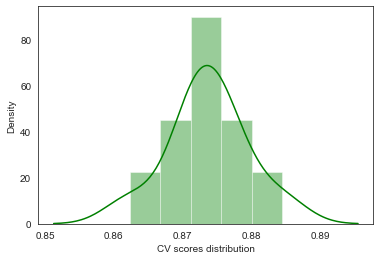

In [84]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, X_test, y_test, cv = 10, scoring='roc_auc')
print('Cross-validation scores:{}'.format(scores))
print("min :" ,scores.min(),"max", scores.max())
print('Mean CV score is: ', round(np.mean(scores),3))
pltt = sns.distplot(pd.Series(scores,name='CV scores distribution'), color='g')

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Step 8: Prepare submission file with final prediction

In [85]:
featX= list(X_train)

In [86]:
X_main_test

Age   Vintage  Avg_Account_Balance  Region_Code_count  \
245725  0.177333  0.430148        119533.111143           0.297355   
245726  0.478677  0.657543        149027.043700           0.395737   
245727  0.228353  0.234222         34770.198374           0.056422   
245728  0.177333  0.523963        139773.789515           0.024421   
245729  0.177333  0.337413        105801.608478           0.056422   
...          ...       ...                  ...                ...   
351032  0.624064  0.847627        683129.023072           0.395737   
351033  0.666973  0.847627        186643.558040           0.119029   
351034  0.321196  0.257535        274330.084991           0.297355   
351035  0.638636  0.874069        118697.746800           0.297355   
351036  0.122665  0.371232         95251.349709          -0.008799   

        Vinate_Age_ratio  Gender_Male  Region_Code_RG251  Region_Code_RG252  \
245725          0.258594            1                  0                  0   
245726          0.350617            1                  0                  0   
245727          0.122466            1                  0                  0   
245728          0.350085            1                  0                  0   
245729          0.189977            0                  0                  0   
...                  ...          ...                ...                ...   
351032          0.521189            1                  0                  0   
351033          0.491271            1                  0                  0   
351034          0.114824            1                  0                  0   
351035          0.554643            1                  0                  0   
351036          0.230639            1                  0                  0   

        Region_Code_RG253  Region_Code_RG254  ...  Is_Active_Yes  \
245725                  0                  1  ...              0   
245726                  0                  0  ...              0   
245727                  0                  0  ...              0   
245728                  0                  0  ...              0   
245729                  0                  0  ...              0   
...                   ...                ...  ...            ...   
351032                  0                  0  ...              1   
351033                  0                  0  ...              0   
351034                  0                  1  ...              0   
351035                  0                  1  ...              1   
351036                  0                  0  ...              0   

        Age_category_1  Age_category_2  Age_category_3  Vintage_category_1  \
245725               0               0               0                   0   
245726               0               0               1                   1   
245727               0               0               0                   0   
245728               0               0               0                   0   
245729               0               0               0                   0   
...                ...             ...             ...                 ...   
351032               0               0               1                   0   
351033               0               0               1                   0   
351034               1               0               0                   0   
351035               0               0               1                   0   
351036               0               0               0                   0   

        Vintage_category_2  Vintage_category_3  \
245725                   0                   0   
245726                   0                   0   
245727                   0                   0   
245728                   0                   0   
245729                   0                   0   
...                    ...                 ...   
351032                   0                   1   
351033                   0                   1   
351034             

In [87]:
X_main_test_Real= X_main_test[featX]
X_main_test_Real

Credit_Product_missing  Vintage_category_3  Age_category_3   Vintage  \
245725                       0                   0               0  0.430148   
245726                       1                   0               1  0.657543   
245727                       0                   0               0  0.234222   
245728                       0                   0               0  0.523963   
245729                       0                   0               0  0.337413   
...                        ...                 ...             ...       ...   
351032                       0                   1               1  0.847627   
351033                       0                   1               1  0.847627   
351034                       0                   0               0  0.257535   
351035                       0                   1               1  0.874069   
351036                       0                   0               0  0.371232   

             Age  Channel_Code_X3  Vinate_Age_ratio  Channel_Code_X2  \
245725  0.177333                0          0.258594                0   
245726  0.478677                0          0.350617                1   
245727  0.228353                0          0.122466                0   
245728  0.177333                0          0.350085                0   
245729  0.177333                0          0.189977                0   
...          ...              ...               ...              ...   
351032  0.624064                0          0.521189                1   
351033  0.666973                0          0.491271                1   
351034  0.321196                0          0.114824                0   
351035  0.638636                1          0.554643                0   
351036  0.122665                0          0.230639                0   

        Occupation_Salaried  Credit_Product_Yes  Is_Active_Yes  \
245725                    0                   1              0   
245726                    0                   0              0   
245727                    1                   0              0   
245728                    0                   0              0   
245729                    0                   0              0   
...                     ...                 ...            ...   
351032                    1                   1              1   
351033                    0                   1              0   
351034                    1                   0              0   
351035                    0                   0              1   
351036                    1                   0              0   

        Region_Code_count  Vintage_category_2  Occupation_Self_Employed  \
245725           0.297355                   0                         0   
245726           0.395737                   0                         0   
245727           0.056422                   0                         0   
245728           0.024421                   0                         0   
245729           0.056422                   0                         0   
...                   ...                 ...                       ...   
351032           0.395737                   0                         0   
351033           0.119029                   0                         0   
351034           0.297355                   0                         0   
351035           0.297355                   0                         0   
351036          -0.008799                   0                         0   

        Gender_Male  
245725            1  
245726            1  
245727            1  
245728            1  
245729            0  
...             ...  
351032            1  
351033            1  
351034            1  
351035            1  
351036            1  

[105312 rows x 15 columns]

In [88]:
#Predict on actual test dataset for final prediction
predicted_test = xgb.predict_proba(X_main_test_Real)[:,1] 
predicted_test

array([0.07, 0.87, 0.05, ..., 0.06, 0.23, 0.06], dtype=float32)

In [89]:
my_submission = pd.DataFrame({'ID': submission['ID'], 'Is_Lead': predicted_test})

In [90]:
my_submission.to_csv(r'C:\Users\TOSHIBA\Desktop\avidya\MLhack2\solution\Leadpred_Extreme_Gradient_Boosting_NirmalTom.csv', index=False)

-------------